### columns info
 - ACADEMIC_STAT_CODE : 중도탈락 여부
 - ADMISSION : 입학 전형
 - AGE : 나이
 - ATTENDANCE : 출석률
 - DOUBLE_MAJOR : 복수전공 여부
 - GRADE : 평균학점
 - INCOME_QUINTILE: 소득분위(5분위)
 - OCCP_GRP_1 : 학과 계열
 - PREPARE_ATTENDANCE : 동일 나이 대비 출석률
 - PREPARE_GRADE : 동일 나이 대비 평균학점
 - PREPARE_join_1years_ago	PREPARE_join_2years_ago	PREPARE_join_3years_ago	PREPARE_join_4years_ago	PREPARE_join_this_year 
   : 동일나이 대비 년도별 교내 프로그램 참가 횟수
 - STUDENT_ID : 학생 고유 번호
 - TOTAL_JOIN : 교내프로그램 총 참가 횟수
 - TOTAL_OFF : 총 휴학 횟수
 - UNI_DIST : 거주지와 대학간의 거리
 - join_1years_ago join_2years_ago join_3years_ago join_4years_ago join_this_year
   : 년도별 교내프로그램 참가 횟수
 - off_1years_ago	off_2years_ago	off_3years_ago	off_4years_ago	off_this_year
   : 년도별 휴학 여부

## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
def str_col(df):
    col = []
    for i in range(0,len(df.dtypes)):
        if str(df.dtypes[i]) == 'object':
            col.append(df.dtypes.index[i])
    print(col)        
    return col


def int_col(df):
    col = []
    for i in range(0,len(df.dtypes)):
        if str(df.dtypes[i]) != 'object':
            col.append(df.dtypes.index[i])
    print(col)        
    return col 

def p_100(a, b):
    print( round( (a/(a+b))*100,2), "%" )
    
def extraction_func(df, col_name, num_list):
    temp = pd.DataFrame()
    for i in num_list:
        temp = pd.concat([ temp, df.loc[df[col_name] == i ] ],axis=0)
    return temp    

In [3]:
student_df = pd.read_csv('./temp_data/student_drop_out.csv',encoding='utf-8')
print(student_df.shape)
print(student_df.dtypes)
print(student_df.isnull().sum())
student_df.tail(5)

(20606, 29)
ACADEMIC_STAT_CODE          object
ADMISSION                   object
AGE                          int64
ATTENDANCE                 float64
DOUBLE_MAJOR                object
GRADE                      float64
INCOME_QUINTILE            float64
OCCP_GRP_1                  object
PREPARE_ATTENDANCE         float64
PREPARE_GRADE              float64
PREPARE_join_1years_ago    float64
PREPARE_join_2years_ago    float64
PREPARE_join_3years_ago    float64
PREPARE_join_4years_ago    float64
PREPARE_join_this_year     float64
STUDENT_ID                   int64
TOTAL_JOIN                 float64
TOTAL_OFF                    int64
UNI_DIST                   float64
join_1years_ago            float64
join_2years_ago            float64
join_3years_ago            float64
join_4years_ago            float64
join_this_year             float64
off_1years_ago              object
off_2years_ago              object
off_3years_ago              object
off_4years_ago              object
off_this

,ACADEMIC_STAT_CODE,ADMISSION,AGE,ATTENDANCE,DOUBLE_MAJOR,GRADE,INCOME_QUINTILE,OCCP_GRP_1,PREPARE_ATTENDANCE,PREPARE_GRADE,...,join_1years_ago,join_2years_ago,join_3years_ago,join_4years_ago,join_this_year,off_1years_ago,off_2years_ago,off_3years_ago,off_4years_ago,off_this_year
20601,유지,수시,23,1.0,Y,3.5,4.0,1.인문사회계열,0.174552,0.251629,...,0.0,1.0,0.0,0.0,0.0,N,Y,Y,N,N
20602,유지,수시,20,0.8,N,3.5,5.0,1.인문사회계열,-0.033741,0.481882,...,0.0,0.0,0.0,0.0,1.0,N,N,N,N,N
20603,유지,수시,20,0.8,N,2.5,5.0,3.공학계열,-0.033741,-0.518118,...,0.0,0.0,0.0,0.0,0.0,N,N,N,N,Y
20604,유지,수시,20,0.7,N,3.0,4.0,3.공학계열,-0.133741,-0.018118,...,0.0,0.0,0.0,0.0,0.0,N,N,N,N,N
20605,유지,수시,20,0.7,N,3.0,5.0,3.공학계열,-0.133741,-0.018118,...,0.0,0.0,0.0,0.0,1.0,N,N,N,N,N


## 데이터 복사

In [4]:
copy_student = student_df.copy()

## 비식별화 컬럼 삭제

In [5]:
copy_student.drop('STUDENT_ID',axis=1, inplace=True)

## 데이터 파악하기

#### 변수간 상관관계 확인

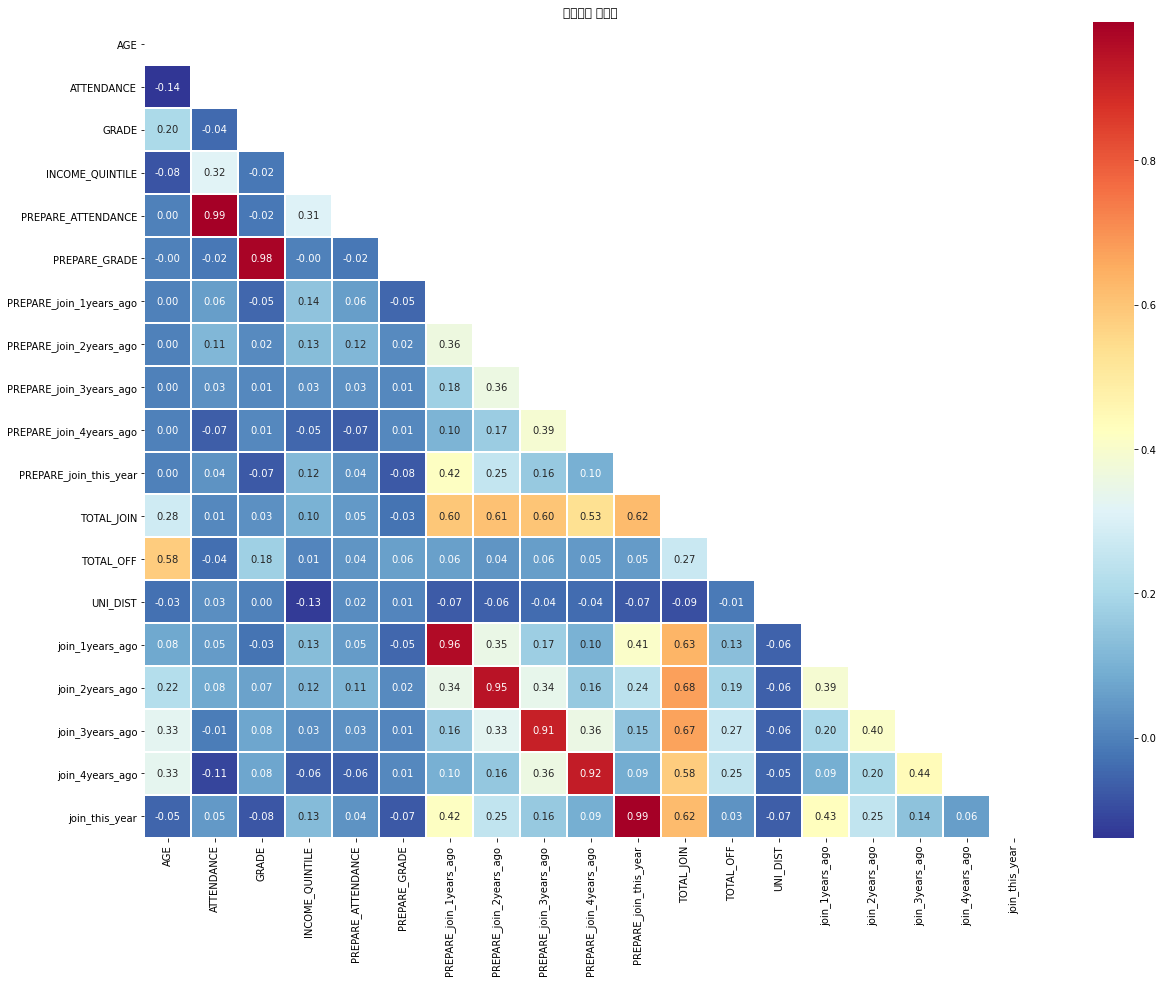

In [6]:
### 필요한 모듈 불러오기
#%matplotlib inline	# 시각화 결과를 Jupyter Notebook에서 바로 보기
# import matplotlib.pyplot as plt    # 모듈 불러오기

### 상관계수 테이블
corr = copy_student.corr()    # 'df'라는 데이터셋을 'corr'라는 이름의 상관계수 테이블로 저장 

### 상관계수 히트맵 그리기

# 히트맵 사이즈 설정
plt.figure(figsize = (20, 15))	

# 히트맵 형태 정의. 여기서는 삼각형 형태(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True

# 히트맵 그리기
sns.heatmap(data = corr,    # 'corr' = 상관계수 테이블
            annot = True,  # 히트맵에 값 표시
            mask=mask,   # 히트맵 형태. 여기서는 위에서 정의한 삼각형 형태
            fmt = '.2f',   # 값 표시 방식. 소숫점 2번째자리까지 
            linewidths = 1.,  # 경계면 실선 구분 여부
            cmap = 'RdYlBu_r')  # 사용할 색 지정 ('python colormap 검색')
plt.title('상관계수 히트맵')
plt.show()

#### 데이터가 정규분포를 이루는지 확인하기
 - 최소 최대 정규화: 모든 feature들의 스케일이 동일하지만, 이상치(outlier)를 잘 처리하지 못한다. (X - MIN) / (MAX-MIN) 
 - Z-점수 정규화(표준화) : 이상치(outlier)를 잘 처리하지만, 정확히 동일한 척도로 정규화 된 데이터를 생성하지는 않는다. (X - 평균) / 표준편차

In [7]:
plot_target = int_col(copy_student)

['AGE', 'ATTENDANCE', 'GRADE', 'INCOME_QUINTILE', 'PREPARE_ATTENDANCE', 'PREPARE_GRADE', 'PREPARE_join_1years_ago', 'PREPARE_join_2years_ago', 'PREPARE_join_3years_ago', 'PREPARE_join_4years_ago', 'PREPARE_join_this_year', 'TOTAL_JOIN', 'TOTAL_OFF', 'UNI_DIST', 'join_1years_ago', 'join_2years_ago', 'join_3years_ago', 'join_4years_ago', 'join_this_year']


AGE 의 가우시안 분포 확인


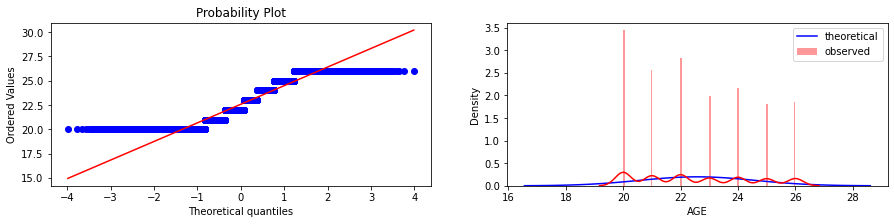


ATTENDANCE 의 가우시안 분포 확인


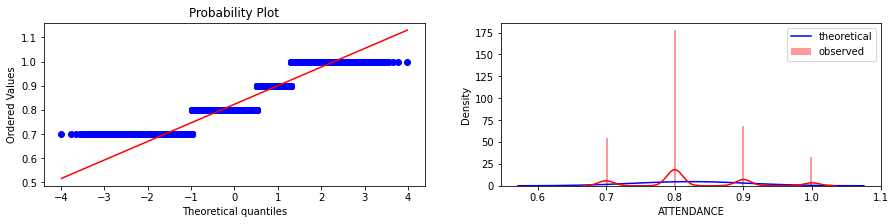


GRADE 의 가우시안 분포 확인


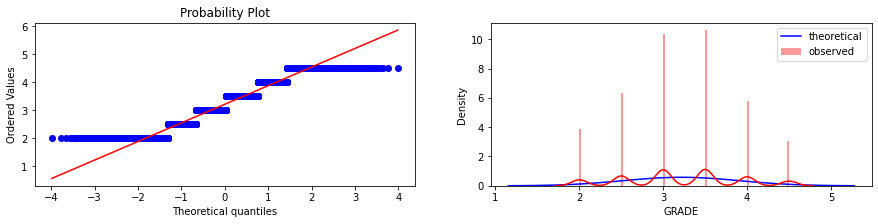


INCOME_QUINTILE 의 가우시안 분포 확인


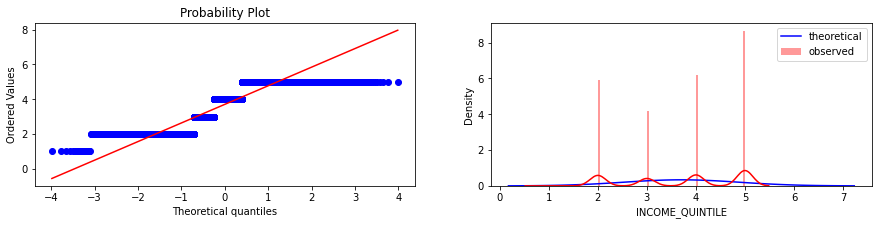


PREPARE_ATTENDANCE 의 가우시안 분포 확인


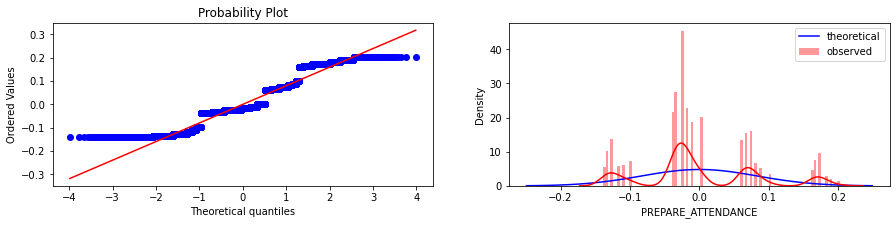


PREPARE_GRADE 의 가우시안 분포 확인


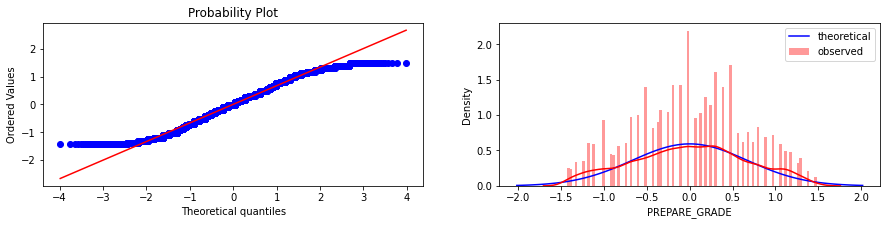


PREPARE_join_1years_ago 의 가우시안 분포 확인


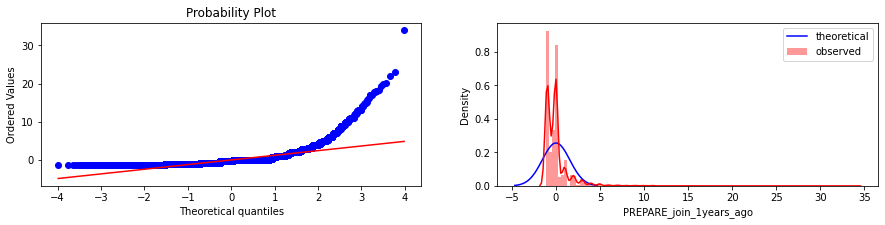


PREPARE_join_2years_ago 의 가우시안 분포 확인


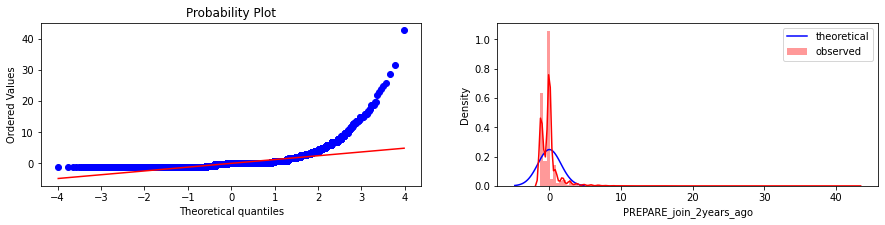


PREPARE_join_3years_ago 의 가우시안 분포 확인


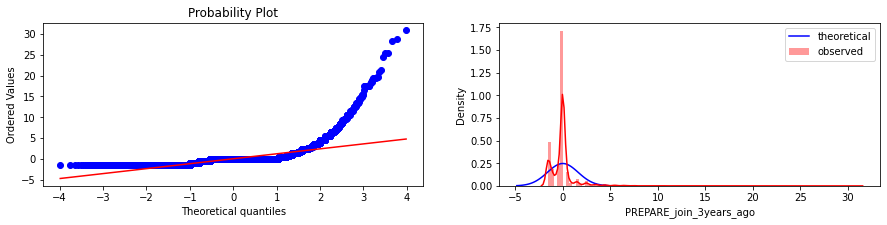


PREPARE_join_4years_ago 의 가우시안 분포 확인


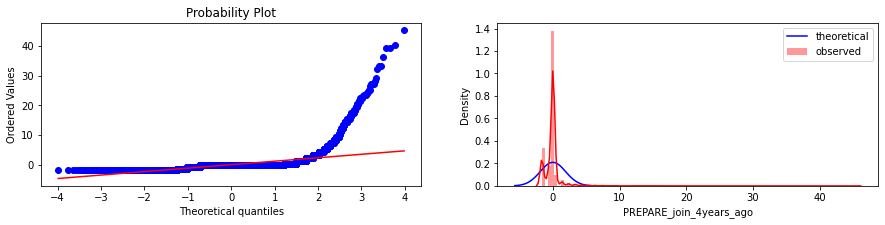


PREPARE_join_this_year 의 가우시안 분포 확인


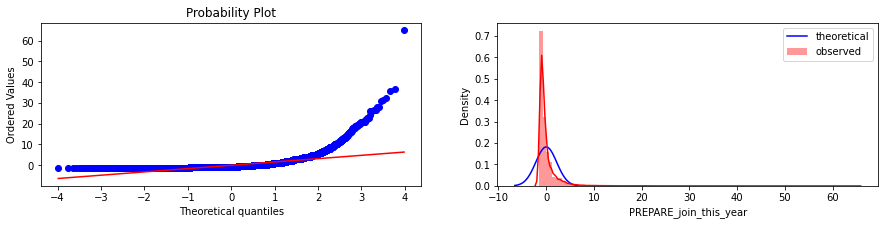


TOTAL_JOIN 의 가우시안 분포 확인


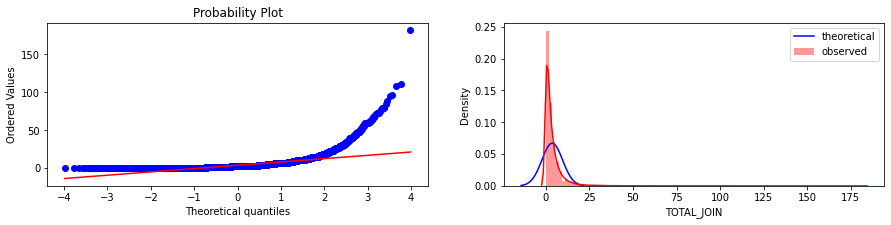


TOTAL_OFF 의 가우시안 분포 확인


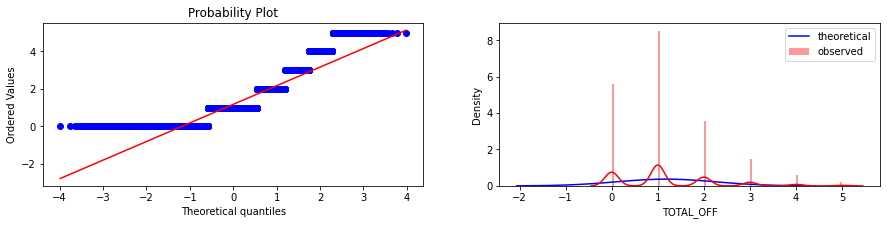


UNI_DIST 의 가우시안 분포 확인


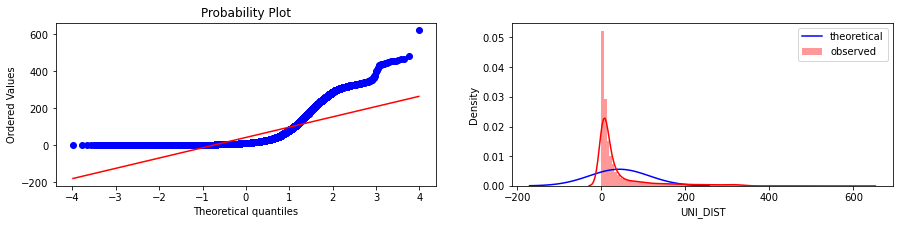


join_1years_ago 의 가우시안 분포 확인


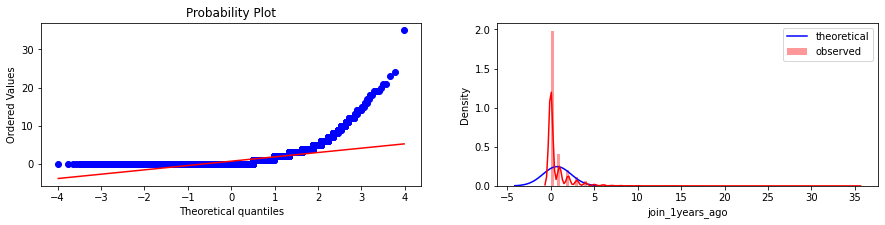


join_2years_ago 의 가우시안 분포 확인


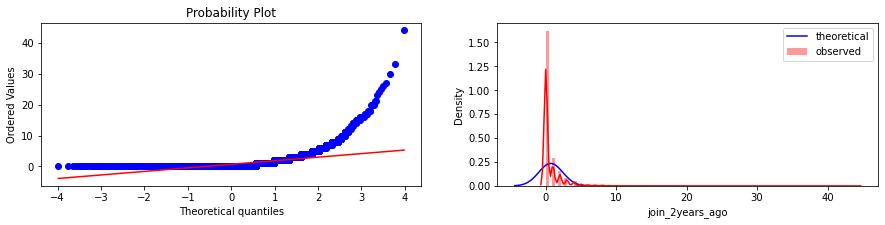


join_3years_ago 의 가우시안 분포 확인


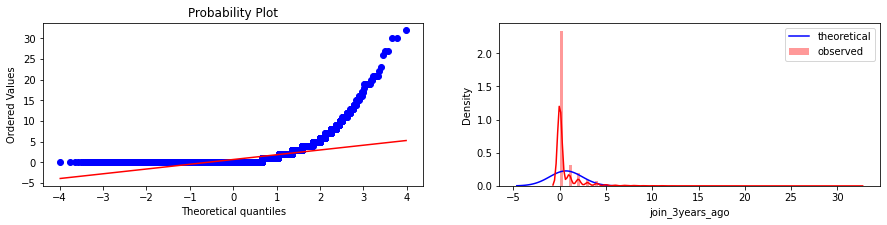


join_4years_ago 의 가우시안 분포 확인


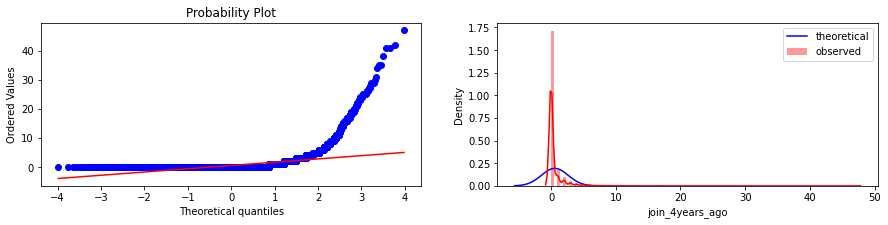


join_this_year 의 가우시안 분포 확인


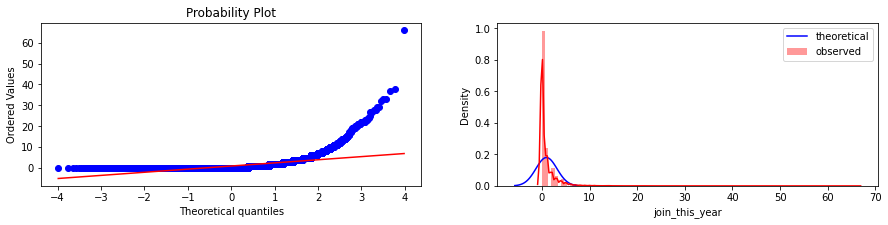

In [8]:
import scipy.stats as stats

for i in plot_target:
    print(i,"의 가우시안 분포 확인")
    fig = plt.figure(figsize=(15,3))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)

    stats.probplot(copy_student[i], dist=stats.norm,plot=ax1)

    mu = copy_student[i].mean()
    variance = copy_student[i].var()
    sigma = variance ** 0.5
    x=np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    ax2.plot(x, stats.norm.pdf(x,mu,sigma), color="blue",label="theoretical")

    sns.distplot(ax=ax2, a=copy_student[i], bins=100, color="red", label="observed")
    ax2.legend()
    plt.show()
    print()

#### stats.kstest으로 가설검증하기
 - 귀무가설은 '정규분포를 따른다' 이다.

In [9]:
for i in plot_target:
    print(i,"귀무가설의 기각 여부 확인")
    test_state, p_val = stats.kstest(copy_student[i],'norm',args=(copy_student[i].mean(), copy_student[i].var()**0.5) )
    print("Test-statistics : {:.5f}, p-value : {:.5f}".format(test_state, p_val))
    print()

AGE 귀무가설의 기각 여부 확인
Test-statistics : 0.14532, p-value : 0.00000

ATTENDANCE 귀무가설의 기각 여부 확인
Test-statistics : 0.30745, p-value : 0.00000

GRADE 귀무가설의 기각 여부 확인
Test-statistics : 0.14655, p-value : 0.00000

INCOME_QUINTILE 귀무가설의 기각 여부 확인
Test-statistics : 0.21193, p-value : 0.00000

PREPARE_ATTENDANCE 귀무가설의 기각 여부 확인
Test-statistics : 0.18707, p-value : 0.00000

PREPARE_GRADE 귀무가설의 기각 여부 확인
Test-statistics : 0.03919, p-value : 0.00000

PREPARE_join_1years_ago 귀무가설의 기각 여부 확인
Test-statistics : 0.28419, p-value : 0.00000

PREPARE_join_2years_ago 귀무가설의 기각 여부 확인
Test-statistics : 0.31942, p-value : 0.00000

PREPARE_join_3years_ago 귀무가설의 기각 여부 확인
Test-statistics : 0.35189, p-value : 0.00000

PREPARE_join_4years_ago 귀무가설의 기각 여부 확인
Test-statistics : 0.38858, p-value : 0.00000

PREPARE_join_this_year 귀무가설의 기각 여부 확인
Test-statistics : 0.25956, p-value : 0.00000

TOTAL_JOIN 귀무가설의 기각 여부 확인
Test-statistics : 0.27197, p-value : 0.00000

TOTAL_OFF 귀무가설의 기각 여부 확인
Test-statistics : 0.27245, p-value : 0.0000

##### 모든 데이터가 정규분포를 따르지 않으므로 MinMaxScaler를 이용해 정규화를 진행

In [10]:
from sklearn.preprocessing import MinMaxScaler

int_data = copy_student[plot_target]

# 인덱스 빼두기 
index = int_data.index

# MinMaxcaler 객체 생성
scaler = MinMaxScaler()

# MinMaxcaler로 데이터 셋 변환 .fit( ) 과 .transform( ) 호출
scaler.fit(int_data)

data_scaled = scaler.transform(int_data)

# XAI를 위해 정규화 되지 않은 데이터를 저장
inverse_data = pd.DataFrame(data=scaler.inverse_transform(data_scaled), columns=int_data.columns, index=index)

inverse_data.to_csv('./temp_data/save_inverse_data.csv',index = True)
# int_data.loc[:,:] = data_scaled

# transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
data_scaled = pd.DataFrame(data=data_scaled, columns=int_data.columns, index=index)

print('feature 들의 정규화 최소 값')
print(data_scaled.min())
print('\nfeature 들의 정규화 최대 값')
print(data_scaled.max())

feature 들의 정규화 최소 값
AGE                        0.0
ATTENDANCE                 0.0
GRADE                      0.0
INCOME_QUINTILE            0.0
PREPARE_ATTENDANCE         0.0
PREPARE_GRADE              0.0
PREPARE_join_1years_ago    0.0
PREPARE_join_2years_ago    0.0
PREPARE_join_3years_ago    0.0
PREPARE_join_4years_ago    0.0
PREPARE_join_this_year     0.0
TOTAL_JOIN                 0.0
TOTAL_OFF                  0.0
UNI_DIST                   0.0
join_1years_ago            0.0
join_2years_ago            0.0
join_3years_ago            0.0
join_4years_ago            0.0
join_this_year             0.0
dtype: float64

feature 들의 정규화 최대 값
AGE                        1.0
ATTENDANCE                 1.0
GRADE                      1.0
INCOME_QUINTILE            1.0
PREPARE_ATTENDANCE         1.0
PREPARE_GRADE              1.0
PREPARE_join_1years_ago    1.0
PREPARE_join_2years_ago    1.0
PREPARE_join_3years_ago    1.0
PREPARE_join_4years_ago    1.0
PREPARE_join_this_year     1.0
TOTAL_JOIN    

##### label컬럼을 제외한 나머지 카테고리 데이터들은 원핫 인코딩을 진행

In [11]:
onehot_target = str_col(copy_student)

onehot_target.remove('ACADEMIC_STAT_CODE')

str_data = copy_student[onehot_target]

onehot_data = pd.get_dummies(str_data)

['ACADEMIC_STAT_CODE', 'ADMISSION', 'DOUBLE_MAJOR', 'OCCP_GRP_1', 'off_1years_ago', 'off_2years_ago', 'off_3years_ago', 'off_4years_ago', 'off_this_year']


#### 인코딩과 스케일링 데이터, 라벨을 합치고 훈련데이터와 검증데이터로 분리

In [12]:
concat_data = pd.concat([data_scaled,onehot_data,copy_student['ACADEMIC_STAT_CODE']], axis=1)

from sklearn.model_selection import train_test_split

label = 'ACADEMIC_STAT_CODE'

x_train, x_test, y_train, y_test = train_test_split(concat_data[concat_data.columns.drop(label)], concat_data[label], test_size=0.15, random_state=42)

train_0 = y_train.to_frame().loc[y_train.to_frame()['ACADEMIC_STAT_CODE'] == '유지'].count()
train_1 = y_train.to_frame().loc[y_train.to_frame()['ACADEMIC_STAT_CODE'] == '탈락'].count()
test_0 = y_test.to_frame().loc[y_test.to_frame()['ACADEMIC_STAT_CODE'] == '유지'].count()
test_1 = y_test.to_frame().loc[y_test.to_frame()['ACADEMIC_STAT_CODE'] == '탈락'].count()
 
print(train_0)
print(train_1)

print(test_0)
print(test_1)

p_100(train_1[0],train_0[0])
p_100(test_1[0],test_0[0])

ACADEMIC_STAT_CODE    16727
dtype: int64
ACADEMIC_STAT_CODE    788
dtype: int64
ACADEMIC_STAT_CODE    2959
dtype: int64
ACADEMIC_STAT_CODE    132
dtype: int64
4.5 %
4.27 %


## 군집화
 - clustering을 통해 유지하는 집단과 탈락하는 집단을 추출
 - 학습데이터셋의 중도탈락률이 4.5%.
 - 따라서 유지집단은 탈락비율의 절반인 약 2.5% 이하의 그룹, 탈락집단은 탈락비율의 2배인 약 8% 이상의 그룹으로 나눔
 - elbowpoint : 각 데이터 요소와 해당 중심 사이의 거리를 측정하고 이 거리를 제곱한 다음 하나의 클러스터에서 이 제곱을 합산하여 계산
 - silhouette : 요소들 간 거리들의 평균을 군집마다 각각 구한 뒤, 이 가운데 가장 작은 값

In [13]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### 1차 군집

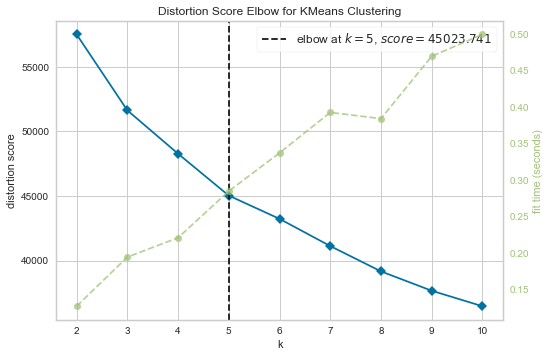

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
# # 파란선은 그룹의 변동성을 확인하는 지표 
# # 세로 점선으로 최적의 군집 개수
# # 녹색 점선은 군집을 학습할 때 걸린 시간이
from yellowbrick.cluster import KElbowVisualizer

x_train_copy = x_train.copy()
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,11))
visualizer.fit(x_train_copy)
visualizer.show()

In [15]:
from sklearn.metrics import silhouette_score

x_train_copy = x_train.copy()

k_range = range(2,11)

best_n = -1
best_silhouette_score = -1

for k in k_range:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_train_copy)
    clusters = kmeans.predict(x_train_copy)
    
    score = silhouette_score(x_train_copy,clusters)
    print('k :', k,'score :', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score= score
print('best n:', best_n, 'best score :', best_silhouette_score)        

k : 2 score : 0.16993744557485707
k : 3 score : 0.16952790492084033
k : 4 score : 0.16985171867973728
k : 5 score : 0.18207636306128203
k : 6 score : 0.15800857123440765
k : 7 score : 0.18382677480048876
k : 8 score : 0.16641851893056303
k : 9 score : 0.17300045335556388
k : 10 score : 0.1822410501951156
best n: 7 best score : 0.18382677480048876


5 개로 군집화
label  cluster
0      0          3320
       1          3751
       2          3143
       3          1995
       4          4518
1      0           128
       1           276
       2           101
       3            68
       4           215
Name: AGE, dtype: int64

0 번째 군집 중도탈락 비율 : 3.71 %
1 번째 군집 중도탈락 비율 : 6.85 %
2 번째 군집 중도탈락 비율 : 3.11 %
3 번째 군집 중도탈락 비율 : 3.3 %
4 번째 군집 중도탈락 비율 : 4.54 %

5 개로 군집화
(17515, 2)
설명력 :  0.5326569054855295


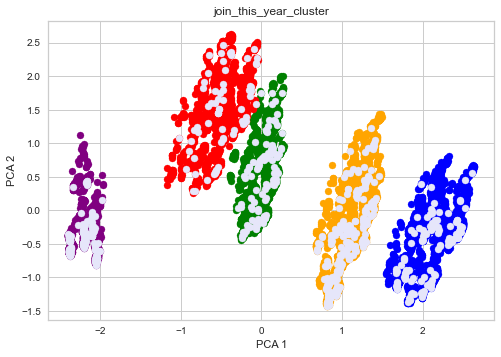

In [16]:
label_data = y_train.copy()
x_train_copy = x_train.copy()

cluster_num = 5

km = KMeans(n_clusters=cluster_num ,init='k-means++', random_state=42)
km.fit(x_train_copy)

label_data = label_data.replace('유지',0)
label_data = label_data.replace('탈락',1)

x_train_copy['label'] = label_data

x_train_copy['cluster'] = km.labels_

cluster_result = x_train_copy.groupby(['label','cluster'])['AGE'].count()
print(cluster_num,"개로 군집화")
print(cluster_result) # groupby로 정답 분포 확인
print()

if len(cluster_result[1]) >= len(cluster_result[0]):
    length = cluster_result[0].index
else:    
    length = cluster_result[1].index
    
for j in length:
    print(j,"번째 군집 중도탈락 비율 : ",end="")
    p_100(cluster_result[1][j],cluster_result[0][j])

# 차원축소
pca = PCA(n_components=2)
pca.fit(x_train_copy)
data_pca = pca.transform(x_train_copy)

print()
print(cluster_num,"개로 군집화")
print(data_pca.shape)
print("설명력 : ",sum(pca.explained_variance_ratio_))

x_train_copy['pca_x'] = data_pca[:,0]
x_train_copy['pca_y'] = data_pca[:,1]

arr = [0 for n in range(cluster_num+1)]
base_color = ['blue','orange','green','red','purple','brown','pink','gray','olive','cyan']

for j in range(0,cluster_num):
    arr[j] = x_train_copy.loc[x_train_copy['cluster'] == j].index

arr[cluster_num] = x_train_copy.loc[x_train_copy['label'] == 1].index   

for j in range(0,len(arr)-1):
    plt.scatter(x=x_train_copy.loc[arr[j],'pca_x'], y=x_train_copy.loc[arr[j],'pca_y'], color=base_color[j])

plt.scatter(x=x_train_copy.loc[arr[len(arr)-1],'pca_x'], y=x_train_copy.loc[arr[len(arr)-1],'pca_y'], color='lavender')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
globals()['{}__cluster'.format(i)] = "{}_cluster".format(i)
plt.title(globals()['{}__cluster'.format(i)])
plt.show()

#### 2차 군집
 - 1차 군집 결과 목표하던 수치를 가진 집단이 없으므로 2차 군집 진행

In [17]:
cluster_0 = x_train_copy.loc[x_train_copy['cluster'] == 0].drop(['label','cluster','pca_x','pca_y'], axis=1)
cluster_1 = x_train_copy.loc[x_train_copy['cluster'] == 1].drop(['label','cluster','pca_x','pca_y'], axis=1)
cluster_2 = x_train_copy.loc[x_train_copy['cluster'] == 2].drop(['label','cluster','pca_x','pca_y'], axis=1)
cluster_3 = x_train_copy.loc[x_train_copy['cluster'] == 3].drop(['label','cluster','pca_x','pca_y'], axis=1)
cluster_4 = x_train_copy.loc[x_train_copy['cluster'] == 4].drop(['label','cluster','pca_x','pca_y'], axis=1)

##### 2차 군집
 - 0번

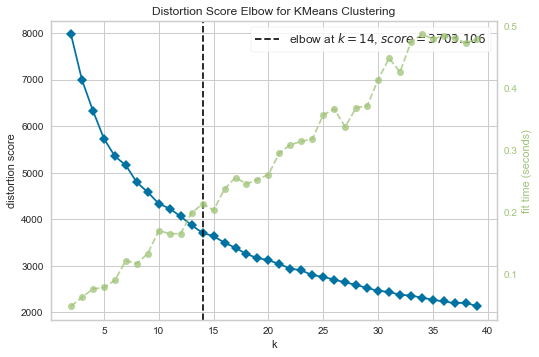

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
# # 파란선은 그룹의 변동성을 확인하는 지표 
# # 세로 점선으로 최적의 군집 개수
# # 녹색 점선은 군집을 학습할 때 걸린 시간이
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,40))
visualizer.fit(cluster_0)
visualizer.show()

In [19]:
from sklearn.metrics import silhouette_score

k_range = range(2,40)

best_n = -1
best_silhouette_score = -1

for k in k_range:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_0)
    clusters = kmeans.predict(cluster_0)
    
    score = silhouette_score(cluster_0,clusters)
    print('k :', k,'score :', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score= score
print('best n:', best_n, 'best score :', best_silhouette_score)        

k : 2 score : 0.1874515063175433
k : 3 score : 0.18511480487331594
k : 4 score : 0.19480484628118913
k : 5 score : 0.21674358603603155
k : 6 score : 0.23479846066407212
k : 7 score : 0.21622760684399897
k : 8 score : 0.21404068281218147
k : 9 score : 0.21928726564462456
k : 10 score : 0.23409053140866884
k : 11 score : 0.2467114563316609
k : 12 score : 0.2527327715395117
k : 13 score : 0.25073510210520666
k : 14 score : 0.2705102224993872
k : 15 score : 0.2668683782390012
k : 16 score : 0.2896027347435376
k : 17 score : 0.30330382752783475
k : 18 score : 0.3055274360646513
k : 19 score : 0.308919223712522
k : 20 score : 0.3117322865866782
k : 21 score : 0.31753391052376334
k : 22 score : 0.29512816666797104
k : 23 score : 0.33115398709749627
k : 24 score : 0.33694757558413674
k : 25 score : 0.3091278613352815
k : 26 score : 0.3116309337127141
k : 27 score : 0.3207143197984336
k : 28 score : 0.29655014799612667
k : 29 score : 0.311243006176362
k : 30 score : 0.34093516577987165
k : 31 s

30 개로 군집화
label  cluster
0      0          337
       1           73
       2          132
       3          109
       4          228
       5           90
       6          156
       7          202
       8           69
       9          118
       10         119
       11         150
       12          98
       13         146
       14          69
       15          63
       16          79
       17          91
       18         267
       19          90
       20          58
       21          89
       22          27
       23          68
       24          62
       25          68
       26          68
       27          74
       28          72
       29          48
1      0           14
       1            2
       2            6
       3            6
       4            4
       5            7
       6           10
       7           13
       8            1
       9            5
       10           2
       11           3
       12           1
       13           5
       

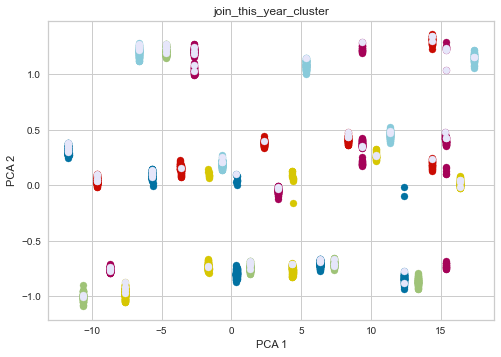

In [20]:
label_data = y_train.copy()
cluster_0_copy = cluster_0.copy()

cluster_num = 30

km = KMeans(n_clusters=cluster_num ,init='k-means++', random_state=42)
km.fit(cluster_0_copy)

label_data = label_data.replace('유지',0)
label_data = label_data.replace('탈락',1)

cluster_0_copy['label'] = label_data

cluster_0_copy['cluster'] = km.labels_

cluster_result = cluster_0_copy.groupby(['label','cluster'])['AGE'].count()
print(cluster_num,"개로 군집화")
print(cluster_result) # groupby로 정답 분포 확인
print()

if len(cluster_result[1]) >= len(cluster_result[0]):
    length = cluster_result[0].index
else:    
    length = cluster_result[1].index
    
for j in length:
    print(j,"번째 군집 중도탈락 비율 : ",end="")
    p_100(cluster_result[1][j],cluster_result[0][j])
    
# 차원축소
pca = PCA(n_components=2)
pca.fit(cluster_0_copy)
data_pca = pca.transform(cluster_0_copy)

print()
print(cluster_num,"개로 군집화")
print(data_pca.shape)
print("설명력 : ",sum(pca.explained_variance_ratio_))

cluster_0_copy['pca_x'] = data_pca[:,0]
cluster_0_copy['pca_y'] = data_pca[:,1]

arr = [0 for n in range(cluster_num+1)]

for j in range(0,cluster_num):
    arr[j] = cluster_0_copy.loc[cluster_0_copy['cluster'] == j].index

arr[cluster_num] = cluster_0_copy.loc[cluster_0_copy['label'] == 1].index   

for j in range(0,len(arr)-1):
    plt.scatter(x=cluster_0_copy.loc[arr[j],'pca_x'], y=cluster_0_copy.loc[arr[j],'pca_y'])

plt.scatter(x=cluster_0_copy.loc[arr[len(arr)-1],'pca_x'], y=cluster_0_copy.loc[arr[len(arr)-1],'pca_y'], color='lavender')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
globals()['{}__cluster'.format(i)] = "{}_cluster".format(i)
plt.title(globals()['{}__cluster'.format(i)])
plt.show()

In [21]:
list_0 = [4,8,10,11,12,14,16,17,18,25]

cluster_0_copy_N = extraction_func(cluster_0_copy,'cluster',list_0)

cluster_0_copy_N

,AGE,ATTENDANCE,GRADE,INCOME_QUINTILE,PREPARE_ATTENDANCE,PREPARE_GRADE,PREPARE_join_1years_ago,PREPARE_join_2years_ago,PREPARE_join_3years_ago,PREPARE_join_4years_ago,...,off_3years_ago_N,off_3years_ago_Y,off_4years_ago_N,off_4years_ago_Y,off_this_year_N,off_this_year_Y,label,cluster,pca_x,pca_y
5026,0.500000,0.000000,0.4,0.50,0.038156,0.405950,0.000000,0.000495,0.000439,0.035663,...,1,0,1,0,0,1,0,4,-7.649663,-0.983440
7167,0.166667,0.666667,0.2,1.00,0.587383,0.280894,0.008099,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,0,4,-7.654760,-0.943946
3366,0.833333,0.333333,0.6,0.75,0.375161,0.533240,0.012557,0.003199,0.127794,0.065155,...,1,0,0,1,0,1,0,4,-7.633194,-0.999606
20237,0.666667,0.666667,1.0,1.00,0.648469,0.893459,0.004773,0.000000,0.000000,0.000319,...,1,0,1,0,0,1,0,4,-7.650368,-0.947163
9119,0.666667,0.333333,0.0,0.75,0.354777,0.035131,0.033228,0.090864,0.123107,0.000319,...,1,0,1,0,0,1,0,4,-7.651435,-0.985944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,0.500000,0.333333,0.6,0.50,0.331848,0.577615,0.028455,0.000495,0.031216,0.035663,...,0,1,1,0,0,1,0,25,13.389572,-0.900463
9184,0.666667,0.333333,0.8,0.25,0.354777,0.721793,0.033228,0.000000,0.000000,0.064129,...,1,0,1,0,0,1,0,25,13.373877,-0.840153
15151,0.333333,0.333333,0.4,0.25,0.330354,0.424067,0.004073,0.003817,0.048759,0.035663,...,1,0,1,0,0,1,0,25,13.371274,-0.834425
16198,0.833333,0.333333,0.6,0.25,0.375161,0.533240,0.012557,0.003199,0.035463,0.043885,...,1,0,1,0,0,1,0,25,13.374038,-0.846924


In [22]:
list_0 = [27]

cluster_0_copy_Y = extraction_func(cluster_0_copy,'cluster',list_0)

cluster_0_copy_Y

,AGE,ATTENDANCE,GRADE,INCOME_QUINTILE,PREPARE_ATTENDANCE,PREPARE_GRADE,PREPARE_join_1years_ago,PREPARE_join_2years_ago,PREPARE_join_3years_ago,PREPARE_join_4years_ago,...,off_3years_ago_N,off_3years_ago_Y,off_4years_ago_N,off_4years_ago_Y,off_this_year_N,off_this_year_Y,label,cluster,pca_x,pca_y
10723,0.666667,0.333333,0.4,1.00,0.354777,0.378462,0.004773,0.000000,0.030777,0.000319,...,1,0,0,1,1,0,0,27,15.327290,0.426318
8786,0.833333,0.000000,0.6,0.25,0.081470,0.533240,0.069467,0.116779,0.312454,0.448011,...,0,1,0,1,1,0,0,27,15.348194,0.359099
3302,0.833333,0.333333,0.2,0.75,0.375161,0.189909,0.012557,0.048631,0.004687,0.001345,...,1,0,0,1,1,0,0,27,15.327679,0.427500
12026,0.833333,0.666667,0.4,0.25,0.668853,0.361575,0.012557,0.003199,0.004687,0.022615,...,0,1,0,1,1,0,0,27,15.344352,0.429521
12088,0.833333,0.333333,0.6,1.00,0.375161,0.533240,0.012557,0.025915,0.004687,0.001345,...,0,1,0,1,1,0,0,27,15.345753,0.371857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,1.000000,0.666667,0.4,0.50,0.706308,0.343331,0.023877,0.058465,0.230583,0.127619,...,0,1,0,1,1,0,0,27,15.346474,1.241298
18444,0.833333,0.333333,1.0,0.50,0.375161,0.876572,0.012557,0.003199,0.004687,0.043885,...,0,1,0,1,1,0,0,27,15.354385,-0.714454
12199,0.666667,1.000000,0.8,1.00,0.942161,0.721793,0.004773,0.022716,0.030777,0.000319,...,0,1,0,1,1,0,0,27,15.378165,0.416036
13550,0.833333,0.333333,0.8,0.75,0.375161,0.704906,0.041012,0.003199,0.158570,0.001345,...,0,1,0,1,1,0,0,27,15.353740,-0.733620


##### 2차 군집
 - 1번

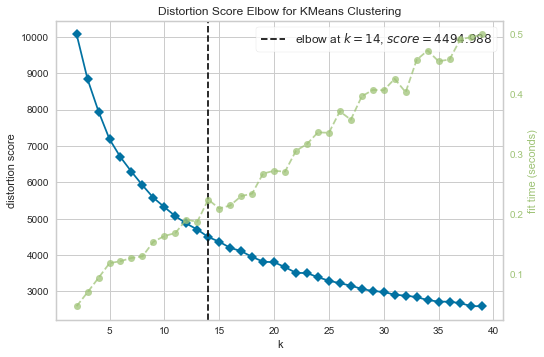

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
# # 파란선은 그룹의 변동성을 확인하는 지표 
# # 세로 점선으로 최적의 군집 개수
# # 녹색 점선은 군집을 학습할 때 걸린 시간이
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,40))
visualizer.fit(cluster_1)
visualizer.show()

In [24]:
from sklearn.metrics import silhouette_score

k_range = range(2,40)

best_n = -1
best_silhouette_score = -1

for k in k_range:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_1)
    clusters = kmeans.predict(cluster_1)
    
    score = silhouette_score(cluster_1,clusters)
    print('k :', k,'score :', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score= score
print('best n:', best_n, 'best score :', best_silhouette_score)        

k : 2 score : 0.17870023041262673
k : 3 score : 0.18821206765013498
k : 4 score : 0.1899897917148947
k : 5 score : 0.19819679239350108
k : 6 score : 0.17169701122371478
k : 7 score : 0.19405950070002767
k : 8 score : 0.21744558578020445
k : 9 score : 0.23783499050810386
k : 10 score : 0.22459414896138047
k : 11 score : 0.26115775249931916
k : 12 score : 0.23415772439739305
k : 13 score : 0.2559591250803446
k : 14 score : 0.26653364560721393
k : 15 score : 0.2684834400059518
k : 16 score : 0.29331112065503284
k : 17 score : 0.29562504926528793
k : 18 score : 0.29710808554707185
k : 19 score : 0.29975715802019876
k : 20 score : 0.30197352831087193
k : 21 score : 0.28293402818384195
k : 22 score : 0.31796201309435057
k : 23 score : 0.32211887929398786
k : 24 score : 0.3300568854225884
k : 25 score : 0.3343123514380032
k : 26 score : 0.3377181711077542
k : 27 score : 0.294415094104287
k : 28 score : 0.34939942154268283
k : 29 score : 0.3540884455713839
k : 30 score : 0.32886449400624507
k 

31 개로 군집화
label  cluster
0      0          350
       1          215
       2           74
       3           73
       4          231
                 ... 
1      26           2
       27           3
       28           4
       29           5
       30           3
Name: AGE, Length: 62, dtype: int64

0 번째 군집 중도탈락 비율 : 5.66 %
1 번째 군집 중도탈락 비율 : 6.93 %
2 번째 군집 중도탈락 비율 : 6.33 %
3 번째 군집 중도탈락 비율 : 1.35 %
4 번째 군집 중도탈락 비율 : 9.41 %
5 번째 군집 중도탈락 비율 : 7.29 %
6 번째 군집 중도탈락 비율 : 5.17 %
7 번째 군집 중도탈락 비율 : 3.19 %
8 번째 군집 중도탈락 비율 : 2.63 %
9 번째 군집 중도탈락 비율 : 6.58 %
10 번째 군집 중도탈락 비율 : 12.08 %
11 번째 군집 중도탈락 비율 : 15.91 %
12 번째 군집 중도탈락 비율 : 7.14 %
13 번째 군집 중도탈락 비율 : 13.19 %
14 번째 군집 중도탈락 비율 : 7.45 %
15 번째 군집 중도탈락 비율 : 13.27 %
16 번째 군집 중도탈락 비율 : 5.65 %
17 번째 군집 중도탈락 비율 : 5.08 %
18 번째 군집 중도탈락 비율 : 4.27 %
19 번째 군집 중도탈락 비율 : 13.79 %
20 번째 군집 중도탈락 비율 : 7.14 %
21 번째 군집 중도탈락 비율 : 9.38 %
22 번째 군집 중도탈락 비율 : 5.59 %
23 번째 군집 중도탈락 비율 : 8.7 %
24 번째 군집 중도탈락 비율 : 9.42 %
25 번째 군집 중도탈락 비율 : 7.58 %
26 번째 군집 중도탈락 비율 : 1.9 %
2

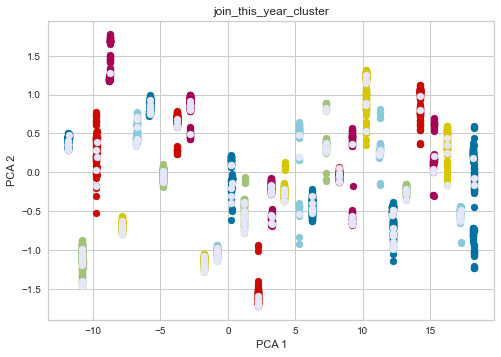

In [25]:
label_data = y_train.copy()
cluster_1_copy = cluster_1.copy()

cluster_num = 31

km = KMeans(n_clusters=cluster_num ,init='k-means++', random_state=42)
km.fit(cluster_1_copy)

label_data = label_data.replace('유지',0)
label_data = label_data.replace('탈락',1)

cluster_1_copy['label'] = label_data

cluster_1_copy['cluster'] = km.labels_

cluster_result = cluster_1_copy.groupby(['label','cluster'])['AGE'].count()
print(cluster_num,"개로 군집화")
print(cluster_result) # groupby로 정답 분포 확인
print()

if len(cluster_result[1]) >= len(cluster_result[0]):
    length = cluster_result[0].index
else:    
    length = cluster_result[1].index
    
for j in length:
    print(j,"번째 군집 중도탈락 비율 : ",end="")
    p_100(cluster_result[1][j],cluster_result[0][j])

# 차원축소
pca = PCA(n_components=2)
pca.fit(cluster_1_copy)
data_pca = pca.transform(cluster_1_copy)

print()
print(cluster_num,"개로 군집화")
print(data_pca.shape)
print("설명력 : ",sum(pca.explained_variance_ratio_))

cluster_1_copy['pca_x'] = data_pca[:,0]
cluster_1_copy['pca_y'] = data_pca[:,1]

arr = [0 for n in range(cluster_num+1)]

for j in range(0,cluster_num):
    arr[j] = cluster_1_copy.loc[cluster_1_copy['cluster'] == j].index

arr[cluster_num] = cluster_1_copy.loc[cluster_1_copy['label'] == 1].index   

for j in range(0,len(arr)-1):
    plt.scatter(x=cluster_1_copy.loc[arr[j],'pca_x'], y=cluster_1_copy.loc[arr[j],'pca_y'])

plt.scatter(x=cluster_1_copy.loc[arr[len(arr)-1],'pca_x'], y=cluster_1_copy.loc[arr[len(arr)-1],'pca_y'], color='lavender')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
globals()['{}__cluster'.format(i)] = "{}_cluster".format(i)
plt.title(globals()['{}__cluster'.format(i)])
plt.show()

In [26]:
list_1 = [4,10,1113,15,19,21,23,24,29]

cluster_1_copy_Y = extraction_func(cluster_1_copy,'cluster',list_1)

cluster_1_copy_Y

,AGE,ATTENDANCE,GRADE,INCOME_QUINTILE,PREPARE_ATTENDANCE,PREPARE_GRADE,PREPARE_join_1years_ago,PREPARE_join_2years_ago,PREPARE_join_3years_ago,PREPARE_join_4years_ago,...,off_3years_ago_N,off_3years_ago_Y,off_4years_ago_N,off_4years_ago_Y,off_this_year_N,off_this_year_Y,label,cluster,pca_x,pca_y
2777,0.166667,0.666667,0.6,0.50,0.587383,0.624225,0.008099,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,1,4,-7.825552,-0.744264
724,0.333333,0.333333,0.4,1.00,0.330354,0.424067,0.004073,0.003817,0.048759,0.035663,...,1,0,1,0,1,0,0,4,-7.823723,-0.631819
4309,0.166667,0.666667,0.6,0.25,0.587383,0.624225,0.008099,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,4,-7.825340,-0.725372
12506,0.333333,0.333333,0.4,0.25,0.330354,0.424067,0.004073,0.003817,0.048759,0.035663,...,1,0,1,0,1,0,1,4,-7.823045,-0.692966
5090,0.500000,0.333333,0.4,1.00,0.331848,0.405950,0.000000,0.045927,0.061992,0.035663,...,1,0,1,0,1,0,0,4,-7.821745,-0.603083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12174,0.666667,0.333333,0.8,0.50,0.354777,0.721793,0.004773,0.000000,0.000000,0.021589,...,0,1,1,0,1,0,0,29,17.223503,-0.541062
11580,0.500000,0.666667,0.6,1.00,0.625540,0.577615,0.000000,0.023211,0.000439,0.035663,...,0,1,1,0,1,0,0,29,17.219277,-0.600369
4673,1.000000,0.000000,0.2,0.75,0.118925,0.171666,0.023877,0.013033,0.015146,0.042540,...,0,1,1,0,1,0,0,29,17.226111,-0.449707
3636,0.500000,0.333333,0.4,0.75,0.331848,0.405950,0.028455,0.000495,0.031216,0.035663,...,0,1,1,0,1,0,0,29,17.219933,-0.566430


In [27]:
list_1 = [3,26,30]

cluster_1_copy_N = extraction_func(cluster_1_copy,'cluster',list_1)

cluster_1_copy_N.head()

,AGE,ATTENDANCE,GRADE,INCOME_QUINTILE,PREPARE_ATTENDANCE,PREPARE_GRADE,PREPARE_join_1years_ago,PREPARE_join_2years_ago,PREPARE_join_3years_ago,PREPARE_join_4years_ago,...,off_3years_ago_N,off_3years_ago_Y,off_4years_ago_N,off_4years_ago_Y,off_this_year_N,off_this_year_Y,label,cluster,pca_x,pca_y
4779,0.833333,0.333333,0.4,0.75,0.375161,0.361575,0.069467,0.048631,0.097017,0.043885,...,0,1,0,1,1,0,0,3,-8.749013,1.712346
11816,0.666667,0.333333,0.4,0.75,0.354777,0.378462,0.061683,0.045432,0.123107,0.021589,...,0,1,0,1,1,0,0,3,-8.750940,1.687235
13453,1.000000,0.666667,0.4,0.75,0.706308,0.343331,0.023877,0.013033,0.045922,0.000000,...,0,1,0,1,1,0,0,3,-8.748252,1.690609
3223,1.000000,0.666667,1.0,0.50,0.706308,0.858328,0.023877,0.013033,0.045922,0.000000,...,1,0,0,1,1,0,0,3,-8.773535,1.191989
13576,0.833333,0.333333,0.8,0.75,0.375161,0.704906,0.012557,0.003199,0.004687,0.086425,...,0,1,0,1,1,0,0,3,-8.747629,1.715709


#### 2차 군집
 - 2번

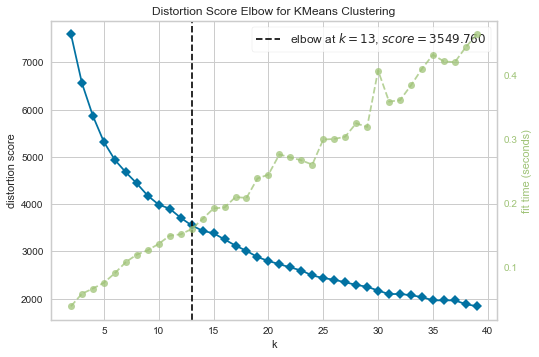

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
# # 파란선은 그룹의 변동성을 확인하는 지표 
# # 세로 점선으로 최적의 군집 개수
# # 녹색 점선은 군집을 학습할 때 걸린 시간이
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,40))
visualizer.fit(cluster_2)
visualizer.show()

In [29]:
from sklearn.metrics import silhouette_score

k_range = range(2,40)

best_n = -1
best_silhouette_score = -1

for k in k_range:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_2)
    clusters = kmeans.predict(cluster_2)
    
    score = silhouette_score(cluster_2,clusters)
    print('k :', k,'score :', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score= score
print('best n:', best_n, 'best score :', best_silhouette_score)        

k : 2 score : 0.1864723839200752
k : 3 score : 0.19425535813854927
k : 4 score : 0.19756251101240338
k : 5 score : 0.19837900658342641
k : 6 score : 0.22207268219488702
k : 7 score : 0.23860466220858273
k : 8 score : 0.20154133540598765
k : 9 score : 0.2235753030410711
k : 10 score : 0.23212460221110678
k : 11 score : 0.2355458965392041
k : 12 score : 0.24803148822855986
k : 13 score : 0.2528424614213204
k : 14 score : 0.266805057296052
k : 15 score : 0.2694933108999302
k : 16 score : 0.28567154902629993
k : 17 score : 0.2938276186128987
k : 18 score : 0.30004692714097064
k : 19 score : 0.32013624200304397
k : 20 score : 0.3268839530556833
k : 21 score : 0.32700231128411805
k : 22 score : 0.3343133467210779
k : 23 score : 0.3404385165176889
k : 24 score : 0.3566701303320209
k : 25 score : 0.3591031834773436
k : 26 score : 0.3430268230353506
k : 27 score : 0.3646167594670146
k : 28 score : 0.325662048273395
k : 29 score : 0.3176797783266343
k : 30 score : 0.3251428747679987
k : 31 score

33 개로 군집화
label  cluster
0      0           98
       1          367
       2          268
       3           74
       4          171
       5          117
       6           34
       7          155
       8           80
       9           79
       10         133
       11          81
       12          57
       13          64
       14          67
       15          53
       16          69
       17          30
       18         142
       19          78
       20          75
       21          94
       22          45
       23          84
       24          91
       25          42
       26          75
       27          65
       28          58
       29          55
       30         117
       31          59
       32          66
1      0            2
       1            9
       2            7
       3            2
       4            6
       6            1
       7            4
       8            3
       9            3
       10           4
       11           6
       

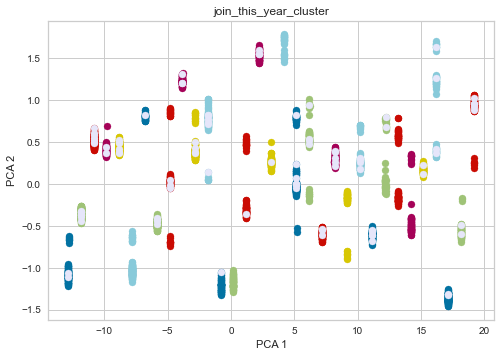

In [30]:
label_data = y_train.copy()
cluster_2_copy = cluster_2.copy()

cluster_num = 33

km = KMeans(n_clusters=cluster_num ,init='k-means++', random_state=42)
km.fit(cluster_2_copy)

label_data = label_data.replace('유지',0)
label_data = label_data.replace('탈락',1)

cluster_2_copy['label'] = label_data

cluster_2_copy['cluster'] = km.labels_

cluster_result = cluster_2_copy.groupby(['label','cluster'])['AGE'].count()
print(cluster_num,"개로 군집화")
print(cluster_result) # groupby로 정답 분포 확인
print()

if len(cluster_result[1]) >= len(cluster_result[0]):
    length = cluster_result[0].index
else:    
    length = cluster_result[1].index
    
for j in length:
    print(j,"번째 군집 중도탈락 비율 : ",end="")
    p_100(cluster_result[1][j],cluster_result[0][j])

# 차원축소
pca = PCA(n_components=2)
pca.fit(cluster_2_copy)
data_pca = pca.transform(cluster_2_copy)

print()
print(cluster_num,"개로 군집화")
print(data_pca.shape)
print("설명력 : ",sum(pca.explained_variance_ratio_))

cluster_2_copy['pca_x'] = data_pca[:,0]
cluster_2_copy['pca_y'] = data_pca[:,1]

arr = [0 for n in range(cluster_num+1)]

for j in range(0,cluster_num):
    arr[j] = cluster_2_copy.loc[cluster_2_copy['cluster'] == j].index

arr[cluster_num] = cluster_2_copy.loc[cluster_2_copy['label'] == 1].index   

for j in range(0,len(arr)-1):
    plt.scatter(x=cluster_2_copy.loc[arr[j],'pca_x'], y=cluster_2_copy.loc[arr[j],'pca_y'])

plt.scatter(x=cluster_2_copy.loc[arr[len(arr)-1],'pca_x'], y=cluster_2_copy.loc[arr[len(arr)-1],'pca_y'], color='lavender')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
globals()['{}__cluster'.format(i)] = "{}_cluster".format(i)
plt.title(globals()['{}__cluster'.format(i)])
plt.show()

In [31]:
list_2 = [0,1,2,5,7,12,13,14,16,17,22,26,27,30]

cluster_2_copy_N = extraction_func(cluster_2_copy,'cluster',list_2)

cluster_2_copy_N

,AGE,ATTENDANCE,GRADE,INCOME_QUINTILE,PREPARE_ATTENDANCE,PREPARE_GRADE,PREPARE_join_1years_ago,PREPARE_join_2years_ago,PREPARE_join_3years_ago,PREPARE_join_4years_ago,...,off_3years_ago_N,off_3years_ago_Y,off_4years_ago_N,off_4years_ago_Y,off_this_year_N,off_this_year_Y,label,cluster,pca_x,pca_y
9452,0.333333,0.333333,0.4,0.75,0.330354,0.424067,0.004073,0.003817,0.048759,0.035663,...,1,0,1,0,0,1,0,0,-12.831562,-1.121184
18947,0.333333,0.666667,0.0,1.00,0.624046,0.080735,0.146349,0.003817,0.048759,0.035663,...,1,0,1,0,0,1,0,0,-12.829808,-1.180765
5081,0.500000,0.666667,0.6,0.75,0.625540,0.577615,0.056910,0.000495,0.031216,0.035663,...,1,0,1,0,0,1,0,0,-12.828963,-1.077503
11352,0.166667,0.333333,0.6,0.50,0.293692,0.624225,0.008099,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,0,0,-12.833073,-1.119376
8685,0.000000,1.000000,0.2,1.00,0.894875,0.313337,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,0,0,-12.830356,-1.215008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18803,1.000000,0.333333,0.0,1.00,0.412617,0.000000,0.023877,0.013033,0.015146,0.021270,...,1,0,1,0,0,1,0,30,17.143253,-1.300751
9650,0.166667,0.333333,0.2,1.00,0.293692,0.280894,0.036554,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,0,30,17.138012,-1.409627
5779,0.166667,0.666667,0.6,0.75,0.587383,0.624225,0.065009,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,0,30,17.139065,-1.365410
15254,0.000000,0.000000,0.2,1.00,0.013799,0.313337,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,0,30,17.135454,-1.430163


In [32]:
list_2 = [32]

cluster_2_copy_Y = extraction_func(cluster_2_copy,'cluster',list_2)

cluster_2_copy_Y

,AGE,ATTENDANCE,GRADE,INCOME_QUINTILE,PREPARE_ATTENDANCE,PREPARE_GRADE,PREPARE_join_1years_ago,PREPARE_join_2years_ago,PREPARE_join_3years_ago,PREPARE_join_4years_ago,...,off_3years_ago_N,off_3years_ago_Y,off_4years_ago_N,off_4years_ago_Y,off_this_year_N,off_this_year_Y,label,cluster,pca_x,pca_y
14499,0.666667,0.666667,0.4,1.00,0.648469,0.378462,0.061683,0.000000,0.000000,0.000319,...,0,1,1,0,1,0,1,32,19.183736,0.915348
6161,0.833333,0.333333,0.2,0.75,0.375161,0.189909,0.012557,0.003199,0.097017,0.043885,...,0,1,1,0,1,0,0,32,19.169310,0.924636
19795,1.000000,0.333333,0.8,0.25,0.412617,0.686663,0.023877,0.013033,0.015146,0.021270,...,0,1,1,0,1,0,0,32,19.183068,1.054543
20230,0.666667,0.333333,0.8,0.25,0.354777,0.721793,0.004773,0.000000,0.000000,0.042859,...,0,1,1,0,0,1,0,32,19.184958,0.260570
4548,0.666667,0.333333,0.2,0.50,0.354777,0.206796,0.033228,0.000000,0.000000,0.000319,...,0,1,1,0,1,0,0,32,19.167582,0.900056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,0.833333,0.333333,0.6,1.00,0.375161,0.533240,0.041012,0.003199,0.035463,0.043885,...,0,1,1,0,1,0,0,32,19.182984,0.959498
13832,0.500000,0.333333,0.8,1.00,0.331848,0.749281,0.000000,0.045927,0.123546,0.035663,...,0,1,1,0,1,0,0,32,19.181030,0.931603
20141,1.000000,0.333333,1.0,0.25,0.412617,0.858328,0.023877,0.013033,0.015146,0.042540,...,0,1,1,0,1,0,0,32,19.182596,1.046613
5104,0.500000,0.333333,0.4,0.75,0.331848,0.405950,0.170730,0.068643,0.031216,0.035663,...,0,1,1,0,1,0,0,32,19.180139,0.887217


##### 2차 군집
 - 3번

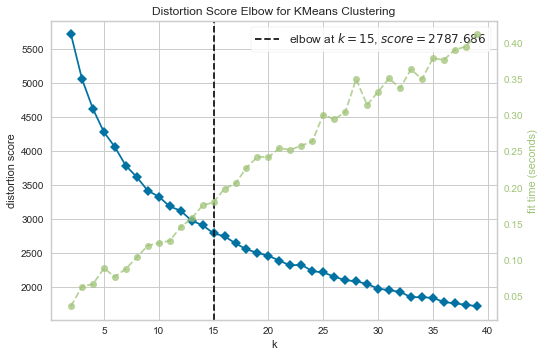

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
# # 파란선은 그룹의 변동성을 확인하는 지표 
# # 세로 점선으로 최적의 군집 개수
# # 녹색 점선은 군집을 학습할 때 걸린 시간이
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,40))
visualizer.fit(cluster_3)
visualizer.show()

In [34]:
from sklearn.metrics import silhouette_score

k_range = range(2,40)

best_n = -1
best_silhouette_score = -1

for k in k_range:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_3)
    clusters = kmeans.predict(cluster_3)
    
    score = silhouette_score(cluster_3,clusters)
    print('k :', k,'score :', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score= score
print('best n:', best_n, 'best score :', best_silhouette_score)        

k : 2 score : 0.18421112167908815
k : 3 score : 0.16058925848869782
k : 4 score : 0.16225419286944692
k : 5 score : 0.17651371025237794
k : 6 score : 0.18268975618028785
k : 7 score : 0.1827412141458889
k : 8 score : 0.17764015363481625
k : 9 score : 0.20324659385412033
k : 10 score : 0.20635079530241499
k : 11 score : 0.2006064982121865
k : 12 score : 0.2082224176213446
k : 13 score : 0.224302334061421
k : 14 score : 0.2090254975817857
k : 15 score : 0.220207681166734
k : 16 score : 0.2256845452716885
k : 17 score : 0.23289775231589116
k : 18 score : 0.2345904369488079
k : 19 score : 0.23517367644541093
k : 20 score : 0.236655010191372
k : 21 score : 0.2591359791874313
k : 22 score : 0.25749986214001463
k : 23 score : 0.2515868409908405
k : 24 score : 0.25692708946597437
k : 25 score : 0.25687054662897896
k : 26 score : 0.2681045282331216
k : 27 score : 0.27485406718973854
k : 28 score : 0.26591836464312835
k : 29 score : 0.25588683675395846
k : 30 score : 0.28866631368817897
k : 31 s

36 개로 군집화
label  cluster
0      0           22
       1           44
       2           92
       3          131
       4           38
                 ... 
1      31           2
       32           2
       33           1
       34           2
       35           3
Name: AGE, Length: 61, dtype: int64

3 번째 군집 중도탈락 비율 : 3.68 %
5 번째 군집 중도탈락 비율 : 7.81 %
6 번째 군집 중도탈락 비율 : 9.86 %
7 번째 군집 중도탈락 비율 : 2.0 %
8 번째 군집 중도탈락 비율 : 3.03 %
9 번째 군집 중도탈락 비율 : 4.32 %
10 번째 군집 중도탈락 비율 : 2.63 %
12 번째 군집 중도탈락 비율 : 2.86 %
13 번째 군집 중도탈락 비율 : 4.84 %
14 번째 군집 중도탈락 비율 : 1.0 %
15 번째 군집 중도탈락 비율 : 4.17 %
17 번째 군집 중도탈락 비율 : 3.39 %
18 번째 군집 중도탈락 비율 : 4.26 %
20 번째 군집 중도탈락 비율 : 6.98 %
21 번째 군집 중도탈락 비율 : 8.82 %
24 번째 군집 중도탈락 비율 : 2.08 %
25 번째 군집 중도탈락 비율 : 8.11 %
28 번째 군집 중도탈락 비율 : 2.27 %
29 번째 군집 중도탈락 비율 : 6.25 %
30 번째 군집 중도탈락 비율 : 5.26 %
31 번째 군집 중도탈락 비율 : 11.76 %
32 번째 군집 중도탈락 비율 : 5.88 %
33 번째 군집 중도탈락 비율 : 1.06 %
34 번째 군집 중도탈락 비율 : 3.57 %
35 번째 군집 중도탈락 비율 : 4.84 %

36 개로 군집화
(2063, 2)
설명력 :  0.9766907553624311


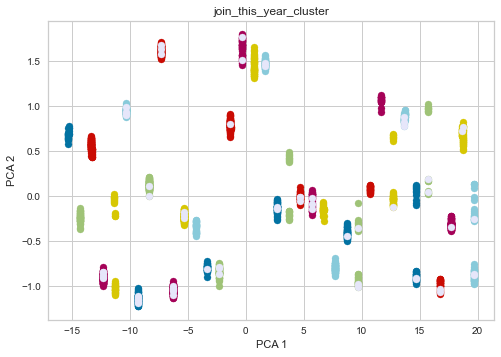

In [35]:
label_data = y_train.copy()
cluster_3_copy = cluster_3.copy()

cluster_num = 36

km = KMeans(n_clusters=cluster_num ,init='k-means++', random_state=42)
km.fit(cluster_3_copy)

label_data = label_data.replace('유지',0)
label_data = label_data.replace('탈락',1)

cluster_3_copy['label'] = label_data

cluster_3_copy['cluster'] = km.labels_

cluster_result = cluster_3_copy.groupby(['label','cluster'])['AGE'].count()
print(cluster_num,"개로 군집화")
print(cluster_result) # groupby로 정답 분포 확인
print()

if len(cluster_result[1]) >= len(cluster_result[0]):
    length = cluster_result[0].index
else:    
    length = cluster_result[1].index
    
for j in length:
    print(j,"번째 군집 중도탈락 비율 : ",end="")
    p_100(cluster_result[1][j],cluster_result[0][j])

# 차원축소
pca = PCA(n_components=2)
pca.fit(cluster_3_copy)
data_pca = pca.transform(cluster_3_copy)

print()
print(cluster_num,"개로 군집화")
print(data_pca.shape)
print("설명력 : ",sum(pca.explained_variance_ratio_))

cluster_3_copy['pca_x'] = data_pca[:,0]
cluster_3_copy['pca_y'] = data_pca[:,1]

arr = [0 for n in range(cluster_num+1)]

for j in range(0,cluster_num):
    arr[j] = cluster_3_copy.loc[cluster_3_copy['cluster'] == j].index

arr[cluster_num] = cluster_3_copy.loc[cluster_3_copy['label'] == 1].index   

for j in range(0,len(arr)-1):
    plt.scatter(x=cluster_3_copy.loc[arr[j],'pca_x'], y=cluster_3_copy.loc[arr[j],'pca_y'])

plt.scatter(x=cluster_3_copy.loc[arr[len(arr)-1],'pca_x'], y=cluster_3_copy.loc[arr[len(arr)-1],'pca_y'], color='lavender')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
globals()['{}__cluster'.format(i)] = "{}_cluster".format(i)
plt.title(globals()['{}__cluster'.format(i)])
plt.show()

In [36]:
list_3 = [0,1,2,4,7,11,14,16,19,22,23,24,26,27,28,33]

cluster_3_copy_N = extraction_func(cluster_3_copy,'cluster',list_3)

cluster_3_copy_N

,AGE,ATTENDANCE,GRADE,INCOME_QUINTILE,PREPARE_ATTENDANCE,PREPARE_GRADE,PREPARE_join_1years_ago,PREPARE_join_2years_ago,PREPARE_join_3years_ago,PREPARE_join_4years_ago,...,off_3years_ago_N,off_3years_ago_Y,off_4years_ago_N,off_4years_ago_Y,off_this_year_N,off_this_year_Y,label,cluster,pca_x,pca_y
6220,0.833333,0.333333,1.0,0.50,0.375161,0.876572,0.012557,0.003199,0.004687,0.065155,...,0,1,0,1,1,0,0,0,-15.301950,0.701621
7608,0.833333,0.333333,1.0,1.00,0.375161,0.876572,0.041012,0.003199,0.004687,0.065155,...,0,1,0,1,1,0,0,0,-15.289893,0.726323
10010,0.833333,0.666667,0.6,0.75,0.668853,0.533240,0.012557,0.025915,0.004687,0.001345,...,0,1,0,1,1,0,0,0,-15.303253,0.647364
14351,1.000000,0.333333,0.6,0.25,0.412617,0.514997,0.023877,0.013033,0.045922,0.000000,...,0,1,0,1,1,0,0,0,-15.301850,0.678970
13512,0.833333,0.333333,0.8,1.00,0.375161,0.704906,0.012557,0.003199,0.004687,0.022615,...,0,1,0,1,1,0,0,0,-15.303171,0.671032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,0.666667,0.333333,0.4,0.25,0.354777,0.378462,0.004773,0.022716,0.000000,0.042859,...,1,0,1,0,0,1,0,33,17.680006,-0.301734
4780,0.833333,0.333333,0.8,1.00,0.375161,0.704906,0.012557,0.003199,0.066240,0.043885,...,1,0,1,0,0,1,0,33,17.679762,-0.247259
8096,0.333333,0.333333,0.6,0.25,0.330354,0.595733,0.004073,0.003817,0.048759,0.035663,...,1,0,1,0,0,1,0,33,17.679655,-0.317879
2049,0.500000,0.333333,0.2,1.00,0.331848,0.234284,0.056910,0.000495,0.000439,0.035663,...,1,0,1,0,0,1,0,33,17.677958,-0.354515


In [37]:
list_3 = [6,21,25,31]

cluster_3_copy_Y = extraction_func(cluster_3_copy,'cluster',list_3)

cluster_3_copy_Y

,AGE,ATTENDANCE,GRADE,INCOME_QUINTILE,PREPARE_ATTENDANCE,PREPARE_GRADE,PREPARE_join_1years_ago,PREPARE_join_2years_ago,PREPARE_join_3years_ago,PREPARE_join_4years_ago,...,off_3years_ago_N,off_3years_ago_Y,off_4years_ago_N,off_4years_ago_Y,off_this_year_N,off_this_year_Y,label,cluster,pca_x,pca_y
3784,0.333333,0.333333,0.4,0.50,0.330354,0.424067,0.004073,0.003817,0.048759,0.035663,...,1,0,1,0,1,0,0,6,-9.297514,-1.148773
3047,0.333333,0.000000,0.2,0.25,0.036662,0.252401,0.004073,0.003817,0.048759,0.035663,...,1,0,1,0,1,0,0,6,-9.289598,-1.122789
14007,0.333333,0.333333,0.4,0.75,0.330354,0.424067,0.004073,0.003817,0.048759,0.035663,...,1,0,1,0,1,0,0,6,-9.297904,-1.152282
6600,0.333333,0.333333,0.6,0.75,0.330354,0.595733,0.004073,0.003817,0.048759,0.035663,...,1,0,1,0,1,0,1,6,-9.299665,-1.168514
3704,0.333333,0.666667,0.2,1.00,0.624046,0.252401,0.032528,0.094682,0.048759,0.035663,...,1,0,1,0,1,0,0,6,-9.301208,-1.212415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14727,0.833333,0.000000,1.0,0.25,0.081470,0.876572,0.041012,0.003199,0.035463,0.001345,...,1,0,0,1,1,0,0,31,15.701719,0.041407
4897,0.666667,0.000000,1.0,0.75,0.061086,0.893459,0.004773,0.022716,0.061553,0.000319,...,0,1,0,1,1,0,0,31,15.683812,0.977751
19747,1.000000,0.333333,1.0,0.25,0.412617,0.858328,0.023877,0.058465,0.015146,0.000000,...,0,1,1,0,1,0,1,31,15.674994,0.193814
276,1.000000,0.333333,0.6,0.25,0.412617,0.514997,0.023877,0.035749,0.015146,0.042540,...,0,1,0,1,1,0,0,31,15.671620,0.941597


##### 2차 군집
 - 4번

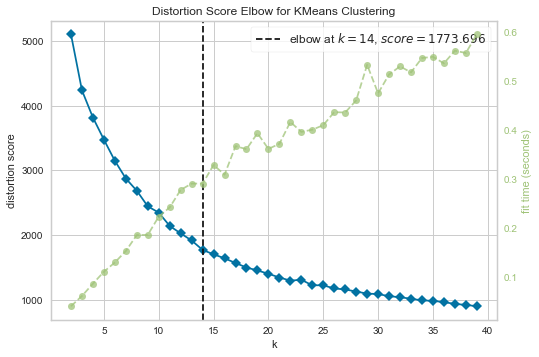

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
# # 파란선은 그룹의 변동성을 확인하는 지표 
# # 세로 점선으로 최적의 군집 개수
# # 녹색 점선은 군집을 학습할 때 걸린 시간이
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,40))
visualizer.fit(cluster_4)
visualizer.show()

In [39]:
from sklearn.metrics import silhouette_score

k_range = range(2,40)

best_n = -1
best_silhouette_score = -1

for k in k_range:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_4)
    clusters = kmeans.predict(cluster_4)
    
    score = silhouette_score(cluster_4,clusters)
    print('k :', k,'score :', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score= score
print('best n:', best_n, 'best score :', best_silhouette_score)        

k : 2 score : 0.3440154083302669
k : 3 score : 0.34304167003428643
k : 4 score : 0.3663540784790597
k : 5 score : 0.3849341174071279
k : 6 score : 0.4130472238399932
k : 7 score : 0.2976056124186608
k : 8 score : 0.290595618637748
k : 9 score : 0.3056215807890712
k : 10 score : 0.3088160429522904
k : 11 score : 0.3265328716430517
k : 12 score : 0.3321196681289773
k : 13 score : 0.3372686952549545
k : 14 score : 0.32752363290497516
k : 15 score : 0.31784694180829287
k : 16 score : 0.32917851426233113
k : 17 score : 0.31517304137563523
k : 18 score : 0.331958003072642
k : 19 score : 0.32072917299260756
k : 20 score : 0.3139543544182244
k : 21 score : 0.31600203374283004
k : 22 score : 0.32255041953701247
k : 23 score : 0.29465519143842683
k : 24 score : 0.30364310503407255
k : 25 score : 0.30713021440616345
k : 26 score : 0.2980462907754876
k : 27 score : 0.3056214276571504
k : 28 score : 0.30250253255083054
k : 29 score : 0.3076216421851806
k : 30 score : 0.28826845595592093
k : 31 scor

14 개로 군집화
label  cluster
0      0          151
       1          472
       2          884
       3           83
       4          302
       5          561
       6          350
       7          323
       8           69
       9          219
       10          97
       11         703
       12         130
       13         174
1      0            5
       1            8
       2           27
       3           11
       4           19
       5           26
       6           23
       7           19
       8            6
       9            9
       10           3
       11          24
       12          26
       13           9
Name: AGE, dtype: int64

0 번째 군집 중도탈락 비율 : 3.21 %
1 번째 군집 중도탈락 비율 : 1.67 %
2 번째 군집 중도탈락 비율 : 2.96 %
3 번째 군집 중도탈락 비율 : 11.7 %
4 번째 군집 중도탈락 비율 : 5.92 %
5 번째 군집 중도탈락 비율 : 4.43 %
6 번째 군집 중도탈락 비율 : 6.17 %
7 번째 군집 중도탈락 비율 : 5.56 %
8 번째 군집 중도탈락 비율 : 8.0 %
9 번째 군집 중도탈락 비율 : 3.95 %
10 번째 군집 중도탈락 비율 : 3.0 %
11 번째 군집 중도탈락 비율 : 3.3 %
12 번째 군집 중도탈락 비율 : 16.67 %
13 번째 군집

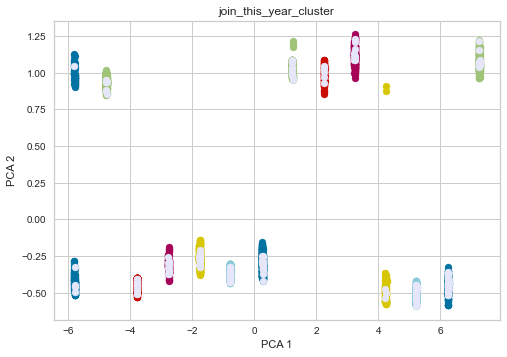

In [40]:
label_data = y_train.copy()
cluster_4_copy = cluster_4.copy()

cluster_num = 14

km = KMeans(n_clusters=cluster_num ,init='k-means++', random_state=42)
km.fit(cluster_4_copy)

label_data = label_data.replace('유지',0)
label_data = label_data.replace('탈락',1)

cluster_4_copy['label'] = label_data

cluster_4_copy['cluster'] = km.labels_

cluster_result = cluster_4_copy.groupby(['label','cluster'])['AGE'].count()
print(cluster_num,"개로 군집화")
print(cluster_result) # groupby로 정답 분포 확인
print()

if len(cluster_result[1]) >= len(cluster_result[0]):
    length = cluster_result[0].index
else:    
    length = cluster_result[1].index
    
for j in length:
    print(j,"번째 군집 중도탈락 비율 : ",end="")
    p_100(cluster_result[1][j],cluster_result[0][j])

# 차원축소
pca = PCA(n_components=2)
pca.fit(cluster_4_copy)
data_pca = pca.transform(cluster_4_copy)

print()
print(cluster_num,"개로 군집화")
print(data_pca.shape)
print("설명력 : ",sum(pca.explained_variance_ratio_))

cluster_4_copy['pca_x'] = data_pca[:,0]
cluster_4_copy['pca_y'] = data_pca[:,1]

arr = [0 for n in range(cluster_num+1)]

for j in range(0,cluster_num):
    arr[j] = cluster_4_copy.loc[cluster_4_copy['cluster'] == j].index

arr[cluster_num] = cluster_4_copy.loc[cluster_4_copy['label'] == 1].index   

for j in range(0,len(arr)-1):
    plt.scatter(x=cluster_4_copy.loc[arr[j],'pca_x'], y=cluster_4_copy.loc[arr[j],'pca_y'])

plt.scatter(x=cluster_4_copy.loc[arr[len(arr)-1],'pca_x'], y=cluster_4_copy.loc[arr[len(arr)-1],'pca_y'], color='lavender')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
globals()['{}__cluster'.format(i)] = "{}_cluster".format(i)
plt.title(globals()['{}__cluster'.format(i)])
plt.show()

In [41]:
list_4 = [1]

cluster_4_copy_N = extraction_func(cluster_4_copy,'cluster',list_4)

cluster_4_copy_N

,AGE,ATTENDANCE,GRADE,INCOME_QUINTILE,PREPARE_ATTENDANCE,PREPARE_GRADE,PREPARE_join_1years_ago,PREPARE_join_2years_ago,PREPARE_join_3years_ago,PREPARE_join_4years_ago,...,off_3years_ago_N,off_3years_ago_Y,off_4years_ago_N,off_4years_ago_Y,off_this_year_N,off_this_year_Y,label,cluster,pca_x,pca_y
2497,0.000000,0.333333,0.4,0.25,0.307491,0.485003,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,0,1,-4.765292,0.938447
2522,0.000000,0.333333,0.0,0.75,0.307491,0.141672,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,0,1,-4.781193,0.991691
19715,0.000000,0.333333,0.6,1.00,0.307491,0.656669,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,0,1,-4.785815,0.967408
17194,0.166667,0.333333,0.8,0.50,0.293692,0.795891,0.036554,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,0,1,-4.769911,0.927467
15451,0.000000,0.333333,0.2,0.75,0.307491,0.313337,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,0,1,-4.780237,0.978748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20376,0.000000,0.000000,0.8,0.25,0.013799,0.828334,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,1,1,-4.765064,0.856385
15087,0.000000,0.333333,0.6,1.00,0.307491,0.656669,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,0,1,-4.785654,0.967670
18047,0.166667,0.333333,0.4,0.50,0.293692,0.452559,0.008099,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,0,1,-4.771556,0.952369
1059,0.000000,0.333333,0.4,1.00,0.307491,0.485003,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,0,1,0,1,-4.786623,0.980368


In [42]:
list_4 = [3,8,12]

cluster_4_copy_Y = extraction_func(cluster_4_copy,'cluster',list_4)

cluster_4_copy_Y

,AGE,ATTENDANCE,GRADE,INCOME_QUINTILE,PREPARE_ATTENDANCE,PREPARE_GRADE,PREPARE_join_1years_ago,PREPARE_join_2years_ago,PREPARE_join_3years_ago,PREPARE_join_4years_ago,...,off_3years_ago_N,off_3years_ago_Y,off_4years_ago_N,off_4years_ago_Y,off_this_year_N,off_this_year_Y,label,cluster,pca_x,pca_y
3965,0.166667,0.333333,0.8,0.75,0.293692,0.795891,0.235739,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,1,3,-2.761870,-0.346958
9525,0.333333,0.333333,0.4,1.00,0.330354,0.424067,0.004073,0.026533,0.048759,0.035663,...,1,0,1,0,1,0,0,3,-2.771963,-0.301023
2425,0.166667,0.333333,0.6,0.50,0.293692,0.624225,0.008099,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,3,-2.758180,-0.345187
953,0.166667,0.333333,0.6,0.75,0.293692,0.624225,0.008099,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,3,-2.765205,-0.331001
8373,0.000000,0.333333,1.0,0.75,0.307491,1.000000,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,3,-2.764512,-0.354917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6731,0.166667,0.333333,0.8,0.25,0.293692,0.795891,0.008099,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,12,6.253352,-0.520558
1409,0.000000,1.000000,0.0,1.00,0.894875,0.141672,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,12,6.235300,-0.326670
9874,0.000000,0.333333,0.8,1.00,0.307491,0.828334,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,12,6.230777,-0.479824
14486,0.000000,0.666667,0.8,1.00,0.601183,0.828334,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,1,12,6.237298,-0.433512


## 추출한 데이터 합치기

In [43]:
print(len(cluster_0_copy_N))
print(len(cluster_0_copy_Y))
print(len(cluster_1_copy_Y))
print(len(cluster_1_copy_N))
print(len(cluster_2_copy_N))
print(len(cluster_2_copy_Y))
print(len(cluster_3_copy_Y))
print(len(cluster_3_copy_N))
print(len(cluster_4_copy_Y))
print(len(cluster_4_copy_N))

1259
81
917
306
1621
72
159
820
325
480


In [44]:
N_data_feature = pd.concat([ cluster_0_copy_N,cluster_1_copy_N,cluster_2_copy_N,cluster_3_copy_N,cluster_4_copy_N], axis=0).iloc[:,:37]
Y_data_feature = pd.concat([ cluster_0_copy_Y,cluster_1_copy_Y,cluster_2_copy_Y,cluster_3_copy_Y,cluster_4_copy_Y], axis=0).iloc[:,:37]

y_train_copy = y_train.copy()

N_data_label = y_train_copy[N_data_feature.index]
Y_data_label = y_train_copy[Y_data_feature.index]

data_feature = pd.concat([N_data_feature,Y_data_feature],axis=0)
data_label = pd.concat([N_data_label,Y_data_label],axis=0)

In [45]:
print(len(data_feature))

print(len(Y_data_label.to_frame().loc[Y_data_label.to_frame()['ACADEMIC_STAT_CODE'] == '탈락']))
print(len(Y_data_label.to_frame().loc[Y_data_label.to_frame()['ACADEMIC_STAT_CODE'] == '유지']))

print(len(N_data_label.to_frame().loc[N_data_label.to_frame()['ACADEMIC_STAT_CODE'] == '탈락']))
print(len(N_data_label.to_frame().loc[N_data_label.to_frame()['ACADEMIC_STAT_CODE'] == '유지']))

6040
169
1385
68
4418


In [46]:
data_feature

,AGE,ATTENDANCE,GRADE,INCOME_QUINTILE,PREPARE_ATTENDANCE,PREPARE_GRADE,PREPARE_join_1years_ago,PREPARE_join_2years_ago,PREPARE_join_3years_ago,PREPARE_join_4years_ago,...,off_1years_ago_N,off_1years_ago_Y,off_2years_ago_N,off_2years_ago_Y,off_3years_ago_N,off_3years_ago_Y,off_4years_ago_N,off_4years_ago_Y,off_this_year_N,off_this_year_Y
5026,0.500000,0.000000,0.4,0.50,0.038156,0.405950,0.000000,0.000495,0.000439,0.035663,...,0,1,1,0,1,0,1,0,0,1
7167,0.166667,0.666667,0.2,1.00,0.587383,0.280894,0.008099,0.028862,0.048759,0.035663,...,0,1,1,0,1,0,1,0,0,1
3366,0.833333,0.333333,0.6,0.75,0.375161,0.533240,0.012557,0.003199,0.127794,0.065155,...,0,1,1,0,1,0,0,1,0,1
20237,0.666667,0.666667,1.0,1.00,0.648469,0.893459,0.004773,0.000000,0.000000,0.000319,...,0,1,1,0,1,0,1,0,0,1
9119,0.666667,0.333333,0.0,0.75,0.354777,0.035131,0.033228,0.090864,0.123107,0.000319,...,0,1,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6731,0.166667,0.333333,0.8,0.25,0.293692,0.795891,0.008099,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,1,0,1,0
1409,0.000000,1.000000,0.0,1.00,0.894875,0.141672,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,1,0,1,0
9874,0.000000,0.333333,0.8,1.00,0.307491,0.828334,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,1,0,1,0
14486,0.000000,0.666667,0.8,1.00,0.601183,0.828334,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,1,0,1,0


## 남은 데이터로 1차 재 군집화

In [47]:
x_train_copy = x_train.copy()
x_train_copy.drop(data_feature.index, inplace=True)

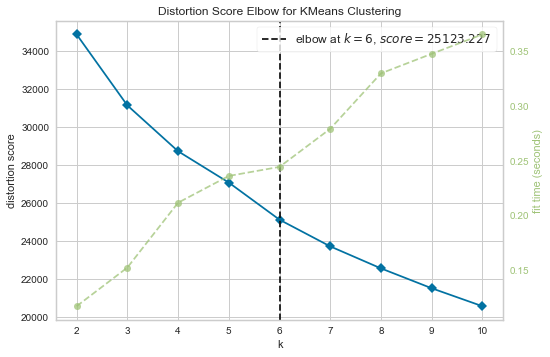

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
# # 파란선은 그룹의 변동성을 확인하는 지표 
# # 세로 점선으로 최적의 군집 개수
# # 녹색 점선은 군집을 학습할 때 걸린 시간이
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,11))
visualizer.fit(x_train_copy)
visualizer.show()

In [49]:
from sklearn.metrics import silhouette_score

k_range = range(2,11)

best_n = -1
best_silhouette_score = -1

for k in k_range:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_train_copy)
    clusters = kmeans.predict(x_train_copy)
    
    score = silhouette_score(x_train_copy,clusters)
    print('k :', k,'score :', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score= score
print('best n:', best_n, 'best score :', best_silhouette_score)        

k : 2 score : 0.20795625668056605
k : 3 score : 0.22330225620091737
k : 4 score : 0.22358169338441172
k : 5 score : 0.2255605443386859
k : 6 score : 0.20989069278184025
k : 7 score : 0.22475407867515035
k : 8 score : 0.23105537298901865
k : 9 score : 0.23626649323978716
k : 10 score : 0.2468565346463819
best n: 10 best score : 0.2468565346463819


3 개로 군집화
label  cluster
0      0          2580
       1          4401
       2          3943
1      0           108
       1           201
       2           242
Name: AGE, dtype: int64

0 번째 군집 중도탈락 비율 : 4.02 %
1 번째 군집 중도탈락 비율 : 4.37 %
2 번째 군집 중도탈락 비율 : 5.78 %

3 개로 군집화
(11475, 2)
설명력 :  0.43594427079282133


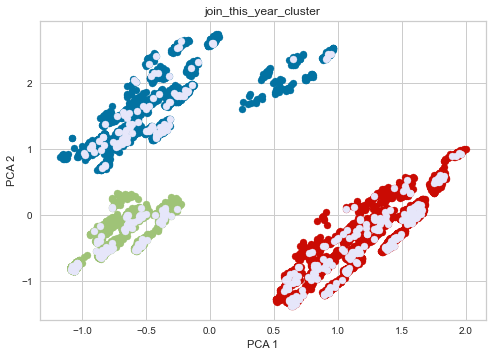

In [50]:
label_data = y_train.copy()
x_train_copy = x_train.copy()
x_train_copy.drop(data_feature.index, inplace=True)

cluster_num = 3

km = KMeans(n_clusters=cluster_num ,init='k-means++', random_state=42)
km.fit(x_train_copy)

label_data = label_data.replace('유지',0)
label_data = label_data.replace('탈락',1)

x_train_copy['label'] = label_data

x_train_copy['cluster'] = km.labels_

cluster_result = x_train_copy.groupby(['label','cluster'])['AGE'].count()
print(cluster_num,"개로 군집화")
print(cluster_result) # groupby로 정답 분포 확인
print()

if len(cluster_result[1]) >= len(cluster_result[0]):
    length = cluster_result[0].index
else:    
    length = cluster_result[1].index
    
for j in length:
    print(j,"번째 군집 중도탈락 비율 : ",end="")
    p_100(cluster_result[1][j],cluster_result[0][j])

# 차원축소
pca = PCA(n_components=2)
pca.fit(x_train_copy)
data_pca = pca.transform(x_train_copy)

print()
print(cluster_num,"개로 군집화")
print(data_pca.shape)
print("설명력 : ",sum(pca.explained_variance_ratio_))

x_train_copy['pca_x'] = data_pca[:,0]
x_train_copy['pca_y'] = data_pca[:,1]

arr = [0 for n in range(cluster_num+1)]

for j in range(0,cluster_num):
    arr[j] = x_train_copy.loc[x_train_copy['cluster'] == j].index

arr[cluster_num] = x_train_copy.loc[x_train_copy['label'] == 1].index   

for j in range(0,len(arr)-1):
    plt.scatter(x=x_train_copy.loc[arr[j],'pca_x'], y=x_train_copy.loc[arr[j],'pca_y'])

plt.scatter(x=x_train_copy.loc[arr[len(arr)-1],'pca_x'], y=x_train_copy.loc[arr[len(arr)-1],'pca_y'], color='lavender')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
globals()['{}__cluster'.format(i)] = "{}_cluster".format(i)
plt.title(globals()['{}__cluster'.format(i)])
plt.show()

#### 2차 재 군집
 - 1차 재 군집 결과 목표하던 수치를 가진 집단이 없으므로 2차 재 군집 진행

In [51]:
cluster2_0 = x_train_copy.loc[x_train_copy['cluster'] == 0].drop(['label','cluster','pca_x','pca_y'], axis=1)
cluster2_1 = x_train_copy.loc[x_train_copy['cluster'] == 1].drop(['label','cluster','pca_x','pca_y'], axis=1)
cluster2_2 = x_train_copy.loc[x_train_copy['cluster'] == 2].drop(['label','cluster','pca_x','pca_y'], axis=1)

##### 2차 재 군집
 - 0번

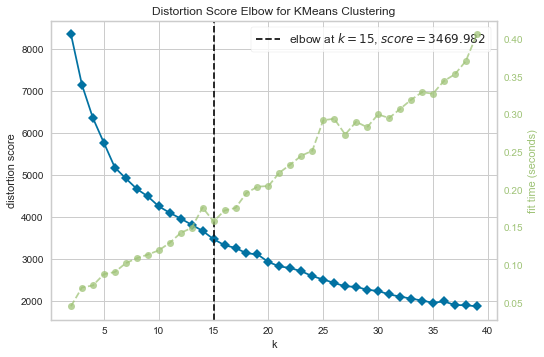

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
# # 파란선은 그룹의 변동성을 확인하는 지표 
# # 세로 점선으로 최적의 군집 개수
# # 녹색 점선은 군집을 학습할 때 걸린 시간이
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,40))
visualizer.fit(cluster2_0)
visualizer.show()

In [53]:
from sklearn.metrics import silhouette_score

k_range = range(2,40)

best_n = -1
best_silhouette_score = -1

for k in k_range:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster2_0)
    clusters = kmeans.predict(cluster2_0)
    
    score = silhouette_score(cluster2_0,clusters)
    print('k :', k,'score :', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score= score
print('best n:', best_n, 'best score :', best_silhouette_score)        

k : 2 score : 0.17540206926520177
k : 3 score : 0.19760241574107512
k : 4 score : 0.20675856414873728
k : 5 score : 0.21946300317819156
k : 6 score : 0.24273850124985744
k : 7 score : 0.23444400306409743
k : 8 score : 0.2393766565530451
k : 9 score : 0.24029463287801486
k : 10 score : 0.24991121295068688
k : 11 score : 0.24590078539232268
k : 12 score : 0.24757057487894116
k : 13 score : 0.25453079819824315
k : 14 score : 0.2547937135263105
k : 15 score : 0.25967675094900194
k : 16 score : 0.2688027234543567
k : 17 score : 0.28481521325608833
k : 18 score : 0.2853321022982906
k : 19 score : 0.28089147897036715
k : 20 score : 0.3010241258516554
k : 21 score : 0.3082364166552382
k : 22 score : 0.3227850380243024
k : 23 score : 0.31760386279762093
k : 24 score : 0.32461094749893615
k : 25 score : 0.33794014536389283
k : 26 score : 0.3425188023865625
k : 27 score : 0.35519853990805544
k : 28 score : 0.35207424010231964
k : 29 score : 0.34645049717463194
k : 30 score : 0.3527934063697579
k 

15 개로 군집화
label  cluster
0      0          196
       1          256
       2          185
       3          165
       4          149
       5          135
       6          118
       7          110
       8          196
       9          242
       10         159
       11         222
       12         163
       13         110
       14         174
1      0            8
       1           11
       2            8
       3            7
       4            5
       5            4
       6            7
       7            5
       8           11
       9            7
       10           9
       11           8
       12           4
       13           6
       14           8
Name: AGE, dtype: int64

0 번째 군집 중도탈락 비율 : 3.92 %
1 번째 군집 중도탈락 비율 : 4.12 %
2 번째 군집 중도탈락 비율 : 4.15 %
3 번째 군집 중도탈락 비율 : 4.07 %
4 번째 군집 중도탈락 비율 : 3.25 %
5 번째 군집 중도탈락 비율 : 2.88 %
6 번째 군집 중도탈락 비율 : 5.6 %
7 번째 군집 중도탈락 비율 : 4.35 %
8 번째 군집 중도탈락 비율 : 5.31 %
9 번째 군집 중도탈락 비율 : 2.81 %
10 번째 군집 중도탈락 비율 : 5.36 %
11 번째 군집 중도탈락 비

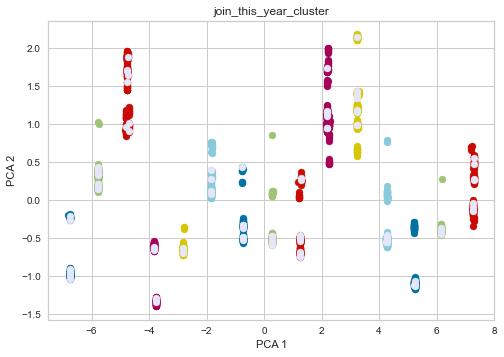

In [54]:
label_data = y_train.copy()
cluster2_0_copy = cluster2_0.copy()

cluster_num = 15

km = KMeans(n_clusters=cluster_num ,init='k-means++', random_state=42)
km.fit(cluster2_0_copy)

label_data = label_data.replace('유지',0)
label_data = label_data.replace('탈락',1)

cluster2_0_copy['label'] = label_data

cluster2_0_copy['cluster'] = km.labels_

cluster_result = cluster2_0_copy.groupby(['label','cluster'])['AGE'].count()
print(cluster_num,"개로 군집화")
print(cluster_result) # groupby로 정답 분포 확인
print()

if len(cluster_result[1]) >= len(cluster_result[0]):
    length = cluster_result[0].index
else:    
    length = cluster_result[1].index
    
for j in length:
    print(j,"번째 군집 중도탈락 비율 : ",end="")
    p_100(cluster_result[1][j],cluster_result[0][j])

# 차원축소
pca = PCA(n_components=2)
pca.fit(cluster2_0_copy)
data_pca = pca.transform(cluster2_0_copy)

print()
print(cluster_num,"개로 군집화")
print(data_pca.shape)
print("설명력 : ",sum(pca.explained_variance_ratio_))

cluster2_0_copy['pca_x'] = data_pca[:,0]
cluster2_0_copy['pca_y'] = data_pca[:,1]

arr = [0 for n in range(cluster_num+1)]

for j in range(0,cluster_num):
    arr[j] = cluster2_0_copy.loc[cluster2_0_copy['cluster'] == j].index

arr[cluster_num] = cluster2_0_copy.loc[cluster2_0_copy['label'] == 1].index   

for j in range(0,len(arr)-1):
    plt.scatter(x=cluster2_0_copy.loc[arr[j],'pca_x'], y=cluster2_0_copy.loc[arr[j],'pca_y'])

plt.scatter(x=cluster2_0_copy.loc[arr[len(arr)-1],'pca_x'], y=cluster2_0_copy.loc[arr[len(arr)-1],'pca_y'], color='lavender')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
globals()['{}__cluster'.format(i)] = "{}_cluster".format(i)
plt.title(globals()['{}__cluster'.format(i)])
plt.show()

In [55]:
list_0 = [12]

cluster2_0_N = extraction_func(cluster2_0_copy,'cluster',list_0)

cluster2_0_N

,AGE,ATTENDANCE,GRADE,INCOME_QUINTILE,PREPARE_ATTENDANCE,PREPARE_GRADE,PREPARE_join_1years_ago,PREPARE_join_2years_ago,PREPARE_join_3years_ago,PREPARE_join_4years_ago,...,off_3years_ago_N,off_3years_ago_Y,off_4years_ago_N,off_4years_ago_Y,off_this_year_N,off_this_year_Y,label,cluster,pca_x,pca_y
1731,1.000000,0.333333,0.6,0.75,0.412617,0.514997,0.023877,0.013033,0.045922,0.063809,...,0,1,1,0,1,0,0,12,5.243596,-1.091307
7582,0.833333,0.000000,0.4,0.25,0.081470,0.361575,0.012557,0.025915,0.004687,0.001345,...,0,1,1,0,1,0,0,12,5.228620,-1.076793
14724,0.666667,0.000000,1.0,0.25,0.061086,0.893459,0.033228,0.022716,0.000000,0.000319,...,0,1,1,0,1,0,0,12,5.239533,-1.081797
12369,0.500000,0.333333,0.4,1.00,0.331848,0.405950,0.028455,0.091359,0.000439,0.035663,...,0,1,1,0,1,0,0,12,5.240845,-1.150335
19749,0.833333,0.333333,1.0,0.75,0.375161,0.876572,0.012557,0.003199,0.004687,0.022615,...,0,1,1,0,1,0,0,12,5.236611,-1.020497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048,0.500000,0.333333,0.8,1.00,0.331848,0.749281,0.056910,0.045927,0.031216,0.035663,...,0,1,1,0,1,0,0,12,5.242905,-1.112879
2105,0.500000,0.333333,0.2,0.25,0.331848,0.234284,0.056910,0.000495,0.000439,0.035663,...,0,1,1,0,1,0,0,12,5.238258,-1.167079
17209,0.666667,0.333333,0.0,0.25,0.354777,0.035131,0.004773,0.000000,0.030777,0.000319,...,0,1,1,0,1,0,0,12,5.229543,-1.124518
17043,0.500000,0.666667,0.2,0.50,0.625540,0.234284,0.000000,0.000495,0.031216,0.035663,...,0,1,1,0,1,0,0,12,5.234154,-1.117163


##### 2차 재 군집
 - 1번

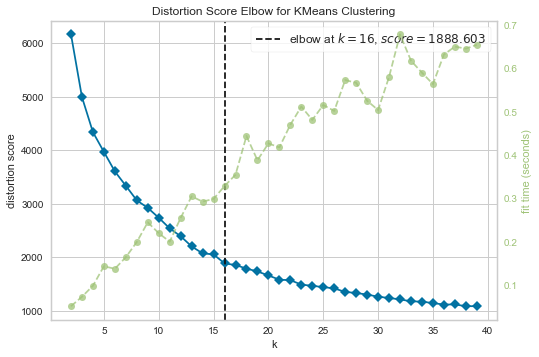

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [56]:
# # 파란선은 그룹의 변동성을 확인하는 지표 
# # 세로 점선으로 최적의 군집 개수
# # 녹색 점선은 군집을 학습할 때 걸린 시간이
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,40))
visualizer.fit(cluster2_1)
visualizer.show()

In [57]:
from sklearn.metrics import silhouette_score

k_range = range(2,40)

best_n = -1
best_silhouette_score = -1

for k in k_range:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster2_1)
    clusters = kmeans.predict(cluster2_1)
    
    score = silhouette_score(cluster2_1,clusters)
    print('k :', k,'score :', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score= score
print('best n:', best_n, 'best score :', best_silhouette_score)        

k : 2 score : 0.304259728136324
k : 3 score : 0.3395309689113448
k : 4 score : 0.35120005565103496
k : 5 score : 0.3760007221694369
k : 6 score : 0.38280809858132087
k : 7 score : 0.39871989456235557
k : 8 score : 0.2884401500878073
k : 9 score : 0.27431348789557086
k : 10 score : 0.3152725884572691
k : 11 score : 0.32737807850999656
k : 12 score : 0.3372500756444208
k : 13 score : 0.3240394520170037
k : 14 score : 0.3328284866108855
k : 15 score : 0.32226408983950927
k : 16 score : 0.3414745877939977
k : 17 score : 0.3330369159069747
k : 18 score : 0.32853882548500635
k : 19 score : 0.3307577438276314
k : 20 score : 0.3232036660219726
k : 21 score : 0.3411849359670049
k : 22 score : 0.3370578257560408
k : 23 score : 0.34755329732854795
k : 24 score : 0.33175764152000686
k : 25 score : 0.3305476183252431
k : 26 score : 0.32362783579057813
k : 27 score : 0.31409318909845385
k : 28 score : 0.33834271237051694
k : 29 score : 0.32388247720533225
k : 30 score : 0.3362876308521808
k : 31 sco

16 개로 군집화
label  cluster
0      0          320
       1          566
       2          329
       3           40
       4          958
       5          319
       6          179
       7          174
       8          187
       9          129
       10         111
       11          91
       12         181
       13         116
       14          76
       15         625
1      0           20
       1           28
       2           19
       3            3
       4           25
       5           19
       6           11
       7            9
       8            6
       9            6
       10           4
       11           6
       12           9
       13           8
       14           5
       15          23
Name: AGE, dtype: int64

0 번째 군집 중도탈락 비율 : 5.88 %
1 번째 군집 중도탈락 비율 : 4.71 %
2 번째 군집 중도탈락 비율 : 5.46 %
3 번째 군집 중도탈락 비율 : 6.98 %
4 번째 군집 중도탈락 비율 : 2.54 %
5 번째 군집 중도탈락 비율 : 5.62 %
6 번째 군집 중도탈락 비율 : 5.79 %
7 번째 군집 중도탈락 비율 : 4.92 %
8 번째 군집 중도탈락 비율 : 3.11 %
9 번째 군집 중도탈락 비율 : 4.4

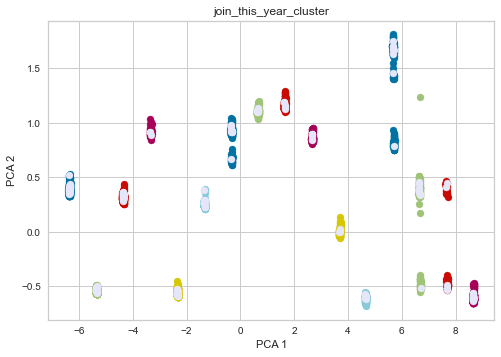

In [58]:
label_data = y_train.copy()
cluster2_1_copy = cluster2_1.copy()

cluster_num = 16

km = KMeans(n_clusters=cluster_num ,init='k-means++', random_state=42)
km.fit(cluster2_1_copy)

label_data = label_data.replace('유지',0)
label_data = label_data.replace('탈락',1)

cluster2_1_copy['label'] = label_data

cluster2_1_copy['cluster'] = km.labels_

cluster_result = cluster2_1_copy.groupby(['label','cluster'])['AGE'].count()
print(cluster_num,"개로 군집화")
print(cluster_result) # groupby로 정답 분포 확인
print()

if len(cluster_result[1]) >= len(cluster_result[0]):
    length = cluster_result[0].index
else:    
    length = cluster_result[1].index
    
for j in length:
    print(j,"번째 군집 중도탈락 비율 : ",end="")
    p_100(cluster_result[1][j],cluster_result[0][j])

# 차원축소
pca = PCA(n_components=2)
pca.fit(cluster2_1_copy)
data_pca = pca.transform(cluster2_1_copy)

print()
print(cluster_num,"개로 군집화")
print(data_pca.shape)
print("설명력 : ",sum(pca.explained_variance_ratio_))

cluster2_1_copy['pca_x'] = data_pca[:,0]
cluster2_1_copy['pca_y'] = data_pca[:,1]

arr = [0 for n in range(cluster_num+1)]

for j in range(0,cluster_num):
    arr[j] = cluster2_1_copy.loc[cluster2_1_copy['cluster'] == j].index

arr[cluster_num] = cluster2_1_copy.loc[cluster2_1_copy['label'] == 1].index   

for j in range(0,len(arr)-1):
    plt.scatter(x=cluster2_1_copy.loc[arr[j],'pca_x'], y=cluster2_1_copy.loc[arr[j],'pca_y'])

plt.scatter(x=cluster2_1_copy.loc[arr[len(arr)-1],'pca_x'], y=cluster2_1_copy.loc[arr[len(arr)-1],'pca_y'], color='lavender')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
globals()['{}__cluster'.format(i)] = "{}_cluster".format(i)
plt.title(globals()['{}__cluster'.format(i)])
plt.show()

In [59]:
list_1 = [4]

cluster2_1_N = extraction_func(cluster2_1_copy,'cluster',list_1)

cluster2_1_N

,AGE,ATTENDANCE,GRADE,INCOME_QUINTILE,PREPARE_ATTENDANCE,PREPARE_GRADE,PREPARE_join_1years_ago,PREPARE_join_2years_ago,PREPARE_join_3years_ago,PREPARE_join_4years_ago,...,off_3years_ago_N,off_3years_ago_Y,off_4years_ago_N,off_4years_ago_Y,off_this_year_N,off_this_year_Y,label,cluster,pca_x,pca_y
20492,0.0,0.333333,0.4,1.00,0.307491,0.485003,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,4,-2.344310,-0.584229
16529,0.0,0.333333,0.0,1.00,0.307491,0.141672,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,4,-2.357746,-0.568242
17413,0.0,0.333333,0.4,0.75,0.307491,0.485003,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,4,-2.341494,-0.570097
18219,0.0,0.000000,0.4,1.00,0.013799,0.485003,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,4,-2.334126,-0.596375
15453,0.0,0.333333,0.4,1.00,0.307491,0.485003,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,4,-2.344303,-0.583609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19115,0.0,0.333333,0.2,0.25,0.307491,0.313337,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,4,-2.342598,-0.534230
15265,0.0,0.000000,0.4,0.25,0.013799,0.485003,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,4,-2.325701,-0.554487
16216,0.0,0.000000,0.4,0.25,0.013799,0.485003,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,4,-2.325713,-0.554761
20227,0.0,0.000000,0.4,0.50,0.013799,0.485003,0.033958,0.028862,0.048759,0.035663,...,1,0,1,0,1,0,0,4,-2.328528,-0.568894


##### 2차 재 군집
 - 2번

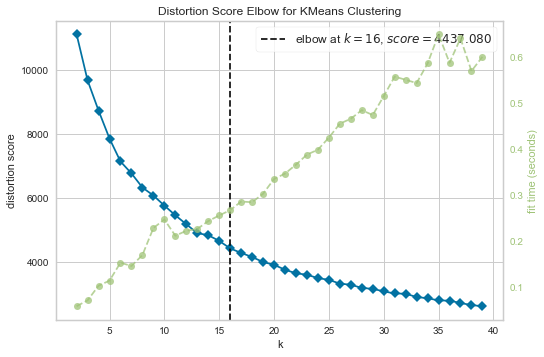

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [60]:
# # 파란선은 그룹의 변동성을 확인하는 지표 
# # 세로 점선으로 최적의 군집 개수
# # 녹색 점선은 군집을 학습할 때 걸린 시간이
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,40))
visualizer.fit(cluster2_2)
visualizer.show()

In [61]:
from sklearn.metrics import silhouette_score

k_range = range(2,40)

best_n = -1
best_silhouette_score = -1

for k in k_range:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster2_2)
    clusters = kmeans.predict(cluster2_2)
    
    score = silhouette_score(cluster2_2,clusters)
    print('k :', k,'score :', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score= score
print('best n:', best_n, 'best score :', best_silhouette_score)        

k : 2 score : 0.18527676280115243
k : 3 score : 0.20033641156888538
k : 4 score : 0.20145661155097627
k : 5 score : 0.2032583000735304
k : 6 score : 0.21448941699858248
k : 7 score : 0.21442372911003743
k : 8 score : 0.2414140295655241
k : 9 score : 0.2410727557259731
k : 10 score : 0.24325741308995635
k : 11 score : 0.23936047686572484
k : 12 score : 0.25541611907449846
k : 13 score : 0.2868609131439627
k : 14 score : 0.26576458283041776
k : 15 score : 0.29272773989647183
k : 16 score : 0.28671663965005606
k : 17 score : 0.30123917707629716
k : 18 score : 0.30315174308938325
k : 19 score : 0.311591398590223
k : 20 score : 0.31348033213068616
k : 21 score : 0.32875214528931673
k : 22 score : 0.3314882420069986
k : 23 score : 0.33425300461351914
k : 24 score : 0.33869021556468787
k : 25 score : 0.3428358938736499
k : 26 score : 0.3493107434348196
k : 27 score : 0.32483467384441167
k : 28 score : 0.36004771840795513
k : 29 score : 0.33507493579896985
k : 30 score : 0.35294633259548586
k 

36 개로 군집화
label  cluster
0      0          213
       1          202
       2          243
       3          275
       4          183
                 ... 
1      31           5
       32           5
       33           4
       34           6
       35           2
Name: AGE, Length: 71, dtype: int64

0 번째 군집 중도탈락 비율 : 6.58 %
1 번째 군집 중도탈락 비율 : 6.05 %
2 번째 군집 중도탈락 비율 : 3.19 %
3 번째 군집 중도탈락 비율 : 5.17 %
4 번째 군집 중도탈락 비율 : 6.15 %
5 번째 군집 중도탈락 비율 : 8.64 %
6 번째 군집 중도탈락 비율 : 5.66 %
7 번째 군집 중도탈락 비율 : 3.99 %
8 번째 군집 중도탈락 비율 : 7.08 %
9 번째 군집 중도탈락 비율 : 2.53 %
10 번째 군집 중도탈락 비율 : 1.75 %
11 번째 군집 중도탈락 비율 : 6.67 %
12 번째 군집 중도탈락 비율 : 5.88 %
13 번째 군집 중도탈락 비율 : 10.29 %
14 번째 군집 중도탈락 비율 : 5.65 %
15 번째 군집 중도탈락 비율 : 7.29 %
16 번째 군집 중도탈락 비율 : 7.61 %
17 번째 군집 중도탈락 비율 : 5.41 %
18 번째 군집 중도탈락 비율 : 15.91 %
19 번째 군집 중도탈락 비율 : 3.12 %
20 번째 군집 중도탈락 비율 : 3.37 %
21 번째 군집 중도탈락 비율 : 5.45 %
22 번째 군집 중도탈락 비율 : 7.45 %
23 번째 군집 중도탈락 비율 : 5.77 %
25 번째 군집 중도탈락 비율 : 3.17 %
26 번째 군집 중도탈락 비율 : 7.14 %
27 번째 군집 중도탈락 비율 : 5.88 %
28

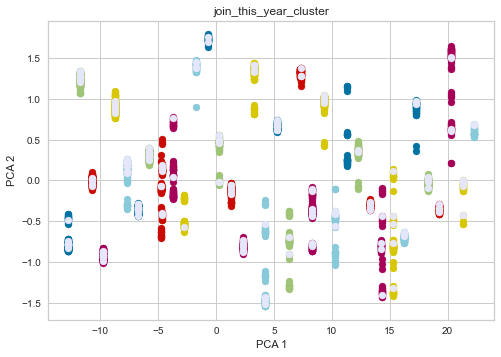

In [62]:
label_data = y_train.copy()
cluster2_2_copy = cluster2_2.copy()

cluster_num = 36

km = KMeans(n_clusters=cluster_num ,init='k-means++', random_state=42)
km.fit(cluster2_2_copy)

label_data = label_data.replace('유지',0)
label_data = label_data.replace('탈락',1)

cluster2_2_copy['label'] = label_data

cluster2_2_copy['cluster'] = km.labels_

cluster_result = cluster2_2_copy.groupby(['label','cluster'])['AGE'].count()
print(cluster_num,"개로 군집화")
print(cluster_result) # groupby로 정답 분포 확인
print()

if len(cluster_result[1]) >= len(cluster_result[0]):
    length = cluster_result[0].index
else:    
    length = cluster_result[1].index
    
for j in length:
    print(j,"번째 군집 중도탈락 비율 : ",end="")
    p_100(cluster_result[1][j],cluster_result[0][j])

# 차원축소
pca = PCA(n_components=2)
pca.fit(cluster2_2_copy)
data_pca = pca.transform(cluster2_2_copy)

print()
print(cluster_num,"개로 군집화")
print(data_pca.shape)
print("설명력 : ",sum(pca.explained_variance_ratio_))

cluster2_2_copy['pca_x'] = data_pca[:,0]
cluster2_2_copy['pca_y'] = data_pca[:,1]

arr = [0 for n in range(cluster_num+1)]

for j in range(0,cluster_num):
    arr[j] = cluster2_2_copy.loc[cluster2_2_copy['cluster'] == j].index

arr[cluster_num] = cluster2_2_copy.loc[cluster2_2_copy['label'] == 1].index   

for j in range(0,len(arr)-1):
    plt.scatter(x=cluster2_2_copy.loc[arr[j],'pca_x'], y=cluster2_2_copy.loc[arr[j],'pca_y'])

plt.scatter(x=cluster2_2_copy.loc[arr[len(arr)-1],'pca_x'], y=cluster2_2_copy.loc[arr[len(arr)-1],'pca_y'], color='lavender')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
globals()['{}__cluster'.format(i)] = "{}_cluster".format(i)
plt.title(globals()['{}__cluster'.format(i)])
plt.show()

In [63]:
list_2 = [5,13,18,30,34]

cluster2_2_Y = extraction_func(cluster2_2_copy,'cluster',list_2)

cluster2_2_Y

,AGE,ATTENDANCE,GRADE,INCOME_QUINTILE,PREPARE_ATTENDANCE,PREPARE_GRADE,PREPARE_join_1years_ago,PREPARE_join_2years_ago,PREPARE_join_3years_ago,PREPARE_join_4years_ago,...,off_3years_ago_N,off_3years_ago_Y,off_4years_ago_N,off_4years_ago_Y,off_this_year_N,off_this_year_Y,label,cluster,pca_x,pca_y
4696,1.000000,0.333333,0.6,0.50,0.412617,0.514997,0.023877,0.013033,0.015146,0.021270,...,0,1,1,0,1,0,0,5,-7.702707,-0.313958
10090,0.666667,0.666667,0.6,0.25,0.648469,0.550128,0.004773,0.022716,0.000000,0.000319,...,1,0,1,0,1,0,0,5,-7.703903,0.196568
9935,1.000000,0.333333,0.2,0.75,0.412617,0.171666,0.023877,0.035749,0.015146,0.000000,...,1,0,0,1,1,0,0,5,-7.696513,0.032244
3477,0.666667,0.333333,0.6,0.25,0.354777,0.550128,0.004773,0.022716,0.000000,0.000319,...,0,1,1,0,1,0,0,5,-7.703143,-0.271808
10140,0.333333,1.000000,0.6,0.25,0.917737,0.595733,0.032528,0.003817,0.048759,0.035663,...,1,0,1,0,1,0,0,5,-7.703984,0.267428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12474,0.333333,0.666667,0.8,0.25,0.624046,0.767398,0.032528,0.003817,0.048759,0.035663,...,1,0,1,0,1,0,1,34,21.279474,-0.025261
6445,0.500000,0.333333,0.6,0.25,0.331848,0.577615,0.000000,0.023211,0.031216,0.035663,...,1,0,1,0,1,0,0,34,21.278649,-0.079804
5757,0.500000,0.666667,0.4,1.00,0.625540,0.405950,0.028455,0.000495,0.000439,0.035663,...,0,1,1,0,1,0,0,34,21.279704,-0.492964
8567,0.333333,0.666667,0.8,1.00,0.624046,0.767398,0.004073,0.026533,0.048759,0.035663,...,1,0,1,0,1,0,0,34,21.278943,-0.048040


In [64]:
list_2 = [9,10]

cluster2_2_N = extraction_func(cluster2_2_copy,'cluster',list_2)

cluster2_2_N

,AGE,ATTENDANCE,GRADE,INCOME_QUINTILE,PREPARE_ATTENDANCE,PREPARE_GRADE,PREPARE_join_1years_ago,PREPARE_join_2years_ago,PREPARE_join_3years_ago,PREPARE_join_4years_ago,...,off_3years_ago_N,off_3years_ago_Y,off_4years_ago_N,off_4years_ago_Y,off_this_year_N,off_this_year_Y,label,cluster,pca_x,pca_y
6399,0.500000,0.333333,0.4,0.75,0.331848,0.405950,0.000000,0.000495,0.031216,0.035663,...,0,1,1,0,1,0,0,9,-3.749550,-0.162604
7019,0.833333,0.333333,0.6,0.50,0.375161,0.533240,0.012557,0.003199,0.035463,0.001345,...,0,1,1,0,1,0,0,9,-3.746832,0.687979
13316,0.500000,1.000000,0.6,1.00,0.919231,0.577615,0.028455,0.091359,0.000439,0.035663,...,0,1,1,0,1,0,0,9,-3.748554,-0.109101
3550,0.666667,0.333333,0.4,0.25,0.354777,0.378462,0.232413,0.068148,0.061553,0.021589,...,0,1,0,1,0,1,0,9,-3.736946,0.067427
517,0.666667,0.333333,0.8,1.00,0.354777,0.721793,0.004773,0.068148,0.030777,0.064129,...,0,1,1,0,1,0,0,9,-3.748768,-0.198460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,0.666667,0.666667,0.8,1.00,0.648469,0.721793,0.061683,0.045432,0.030777,0.000319,...,1,0,0,1,1,0,0,10,-2.747897,-0.521632
7577,0.833333,0.666667,0.8,0.25,0.668853,0.704906,0.012557,0.003199,0.035463,0.001345,...,1,0,0,1,0,1,0,10,-2.743256,-0.184967
13623,0.666667,0.333333,1.0,0.75,0.354777,0.893459,0.004773,0.045432,0.123107,0.042859,...,1,0,0,1,0,1,0,10,-2.743610,-0.219520
13184,1.000000,0.333333,0.6,1.00,0.412617,0.514997,0.023877,0.013033,0.138252,0.000000,...,1,0,0,1,1,0,0,10,-2.748078,-0.586480


## 추출한 데이터 합치기

In [65]:
print(len(cluster2_0_N))
print(len(cluster2_1_N))
print(len(cluster2_2_Y))
print(len(cluster2_2_N))

167
983
304
136


In [66]:
N_data_feature_2 = pd.concat([ cluster2_0_N, cluster2_1_N, cluster2_2_N ], axis=0).iloc[:,:37]
Y_data_feature_2 = cluster2_2_Y.iloc[:,:37]

y_train_copy = y_train.copy()

N_data_label_2 = y_train_copy[N_data_feature_2.index]
Y_data_label_2 = y_train_copy[Y_data_feature_2.index]

data_feature_2 = pd.concat([N_data_feature_2,Y_data_feature_2],axis=0)
data_label_2 = pd.concat([N_data_label_2,Y_data_label_2],axis=0)

In [67]:
print(len(data_feature_2))

print(len(Y_data_label_2.to_frame().loc[Y_data_label_2.to_frame()['ACADEMIC_STAT_CODE'] == '탈락']))
print(len(Y_data_label_2.to_frame().loc[Y_data_label_2.to_frame()['ACADEMIC_STAT_CODE'] == '유지']))

print(len(N_data_label_2.to_frame().loc[N_data_label_2.to_frame()['ACADEMIC_STAT_CODE'] == '탈락']))
print(len(N_data_label_2.to_frame().loc[N_data_label_2.to_frame()['ACADEMIC_STAT_CODE'] == '유지']))

1590
38
266
32
1254


In [68]:
data_feature_2

,AGE,ATTENDANCE,GRADE,INCOME_QUINTILE,PREPARE_ATTENDANCE,PREPARE_GRADE,PREPARE_join_1years_ago,PREPARE_join_2years_ago,PREPARE_join_3years_ago,PREPARE_join_4years_ago,...,off_1years_ago_N,off_1years_ago_Y,off_2years_ago_N,off_2years_ago_Y,off_3years_ago_N,off_3years_ago_Y,off_4years_ago_N,off_4years_ago_Y,off_this_year_N,off_this_year_Y
1731,1.000000,0.333333,0.6,0.75,0.412617,0.514997,0.023877,0.013033,0.045922,0.063809,...,1,0,1,0,0,1,1,0,1,0
7582,0.833333,0.000000,0.4,0.25,0.081470,0.361575,0.012557,0.025915,0.004687,0.001345,...,1,0,1,0,0,1,1,0,1,0
14724,0.666667,0.000000,1.0,0.25,0.061086,0.893459,0.033228,0.022716,0.000000,0.000319,...,1,0,1,0,0,1,1,0,1,0
12369,0.500000,0.333333,0.4,1.00,0.331848,0.405950,0.028455,0.091359,0.000439,0.035663,...,1,0,1,0,0,1,1,0,1,0
19749,0.833333,0.333333,1.0,0.75,0.375161,0.876572,0.012557,0.003199,0.004687,0.022615,...,1,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12474,0.333333,0.666667,0.8,0.25,0.624046,0.767398,0.032528,0.003817,0.048759,0.035663,...,1,0,0,1,1,0,1,0,1,0
6445,0.500000,0.333333,0.6,0.25,0.331848,0.577615,0.000000,0.023211,0.031216,0.035663,...,1,0,0,1,1,0,1,0,1,0
5757,0.500000,0.666667,0.4,1.00,0.625540,0.405950,0.028455,0.000495,0.000439,0.035663,...,1,0,0,1,0,1,1,0,1,0
8567,0.333333,0.666667,0.8,1.00,0.624046,0.767398,0.004073,0.026533,0.048759,0.035663,...,1,0,0,1,1,0,1,0,1,0


## 두번으로 나누어 군집된 데이터들을 합치고 저장

In [69]:
real_feature = pd.concat([data_feature,data_feature_2],axis=0)

In [70]:
real_feature.to_csv('./temp_data/save_real_feature.csv',index = True)
data_label.to_csv('./temp_data/save_data_label.csv',index = True)
data_label_2.to_csv('./temp_data/save_data_label_2.csv',index = True)
x_test.to_csv('./temp_data/save_x_test.csv',index = True)
y_test.to_csv('./temp_data/save_y_test.csv',index = True)